## About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.
The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

## Objective
The company aims to effectively interpret and transform the data produced by data engineering pipelines by:
- Cleaning, sanitizing, and transforming raw data to extract valuable features
- Analyzing and structuring the raw data to support the data science team in developing accurate forecasting models

# Column Profiling

- **data** – Indicates whether the data is testing or training data  
- **trip_creation_time** – Timestamp of trip creation  
- **route_schedule_uuid** – Unique ID for a particular route schedule  
- **route_type** – Transportation type  
- **FTL** – Full Truck Load: FTL shipments reach the destination sooner, as the truck makes no other pickups or drop-offs along the way  
- **Carting** – Handling system consisting of small vehicles (carts)  
- **trip_uuid** – Unique ID given to a particular trip (A trip may include different source and destination centers)  
- **source_center** – Source ID of trip origin  
- **source_name** – Source name of trip origin  
- **destination_center** – Destination ID  
- **destination_name** – Destination name  
- **od_start_time** – Trip start time  
- **od_end_time** – Trip end time  
- **start_scan_to_end_scan** – Time taken to deliver from source to destination  
- **is_cutoff** – Unknown field  
- **cutoff_factor** – Unknown field  
- **cutoff_timestamp** – Unknown field  
- **actual_distance_to_destination** – Distance in kilometers between source and destination warehouse  
- **actual_time** – Actual cumulative time taken to complete the delivery  
- **osrm_time** – Time calculated by an open-source routing engine (OSRM) computing the shortest path including usual traffic, major and minor roads (Cumulative)  
- **osrm_distance** – Distance calculated by OSRM, including usual traffic and road types (Cumulative)  
- **factor** – Unknown field  
- **segment_actual_time** – Time taken for a segment of the package delivery  
- **segment_osrm_time** – OSRM time for a segment of the package delivery  
- **segment_osrm_distance** – OSRM distance covered by a segment of the package delivery  
- **segment_factor** – Unknown field  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as spy

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
import os

In [ ]:
!gdown 1zoGyoCnntlxXh5rnRoDDzZ_OGTzQMC4q

Downloading...
From: https://drive.google.com/uc?id=1zoGyoCnntlxXh5rnRoDDzZ_OGTzQMC4q
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 60.0MB/s]


In [ ]:
df = pd.read_csv('delhivery_data.csv')
df

data          trip_creation_time  \
0       training  2018-09-20 02:35:36.476840   
1       training  2018-09-20 02:35:36.476840   
2       training  2018-09-20 02:35:36.476840   
3       training  2018-09-20 02:35:36.476840   
4       training  2018-09-20 02:35:36.476840   
...          ...                         ...   
144862  training  2018-09-20 16:24:28.436231   
144863  training  2018-09-20 16:24:28.436231   
144864  training  2018-09-20 16:24:28.436231   
144865  training  2018-09-20 16:24:28.436231   
144866  training  2018-09-20 16:24:28.436231   

                                      route_schedule_uuid route_type  \
0       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
...                                                   ...        ...   
144862  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144863  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144864  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144865  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144866  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   

                      trip_uuid source_center                 source_name  \
0       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
...                         ...           ...                         ...   
144862  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144863  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144864  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144865  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144866  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   

       destination_center               destination_name  \
0            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
...                   ...                            ...   
144862       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144863       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144864       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144865       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144866       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   

                     od_start_time  ...            cutoff_timestamp  \
0       2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1       2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2       2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3       2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4       2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   
...                            ...  ...                         ...   
144862  2018-09-20 16:24:28.436231  ...         2018-09-20 21:57:20   
144863  2018-09-20 16:24:28.436231  ...         2018-09-20 21:31:18   
144864  2018-09-20 16:24:28.436231  ...         2018-09-20 21:11:18   
144865  2018-09-20 16:24:28.436231  ...         2018-09-20 20:53:19   
144866  2018-09-20 16:24:28.436231  ...  2018-09-20 16:24:28.436231   

        actual_distance_to_destination  actual_time  osrm_time osrm_dis

In [ ]:
#shape of the data
df.shape

(144867, 24)

In [ ]:
#Columns present in the data set
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
#data types of the columns
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
#Dropping unknown fileds
unknown_fields = ['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor']
df = df.drop(columns = unknown_fields)

In [ ]:
#indentify number of unique entries in each column
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
dtype: int64

In [ ]:
float64_cols = df.select_dtypes(include=['float64']).columns
df[float64_cols] = df[float64_cols].astype(np.float32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float32
 12  actual_distance_

In [ ]:
date_time_columns = ['trip_creation_time','od_start_time','od_end_time']
for i in date_time_columns:
  df[i] = pd.to_datetime(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
#Time period of the given data
df['trip_creation_time'].min(), df['od_end_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-08 03:00:24.353479'))

##Basic Data Cleaning

Handling missing values

In [ ]:
#check for null values
df.isnull().sum()


data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

There are 293 and 261 null values in the source_name and destination_name respectively.

In [ ]:
missing_source_name = df.loc[df['source_name'].isnull(), 'source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
for i in missing_source_name:
  unique_source_name = df.loc[df['source_center'] == i, 'source_name'].unique()
  if pd.isna(unique_source_name):
    print('Source center:', i , '-'*5, 'Source name :', 'Not found')
  else:
    print('Source center:', i , '-'*5, 'Source name :', unique_source_name)

Source center: IND342902A1B ----- Source name : Not found
Source center: IND577116AAA ----- Source name : Not found
Source center: IND282002AAD ----- Source name : Not found
Source center: IND465333A1B ----- Source name : Not found
Source center: IND841301AAC ----- Source name : Not found
Source center: IND509103AAC ----- Source name : Not found
Source center: IND126116AAA ----- Source name : Not found
Source center: IND331022A1B ----- Source name : Not found
Source center: IND505326AAB ----- Source name : Not found
Source center: IND852118A1B ----- Source name : Not found


In [ ]:
missing_destination_name = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()
missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [ ]:
for i in missing_destination_name:
    unique_destination_name = df.loc[df['destination_center'] == i, 'destination_name'].unique()
    if (pd.isna(unique_source_name)) or (unique_source_name.size == 0):
        print("Destination Center :", i, "-" * 10, "Destination Name :", 'Not Found')
    else :
        print("Destination Center :", i, "-" * 10, "Destination Name :", unique_destination_name)

Destination Center : IND342902A1B ---------- Destination Name : Not Found
Destination Center : IND577116AAA ---------- Destination Name : Not Found
Destination Center : IND282002AAD ---------- Destination Name : Not Found
Destination Center : IND465333A1B ---------- Destination Name : Not Found
Destination Center : IND841301AAC ---------- Destination Name : Not Found
Destination Center : IND505326AAB ---------- Destination Name : Not Found
Destination Center : IND852118A1B ---------- Destination Name : Not Found
Destination Center : IND126116AAA ---------- Destination Name : Not Found
Destination Center : IND509103AAC ---------- Destination Name : Not Found
Destination Center : IND221005A1A ---------- Destination Name : Not Found
Destination Center : IND250002AAC ---------- Destination Name : Not Found
Destination Center : IND331001A1C ---------- Destination Name : Not Found
Destination Center : IND122015AAC ---------- Destination Name : Not Found


In [ ]:
#Check if the IDs for which the source name are missing are same IDs for which the destination is missing as well
np.all(df.loc[df['source_name'].isnull(), 'source_center'].isin(missing_destination_name))

np.False_

In [ ]:
#Treating missing destination and source names
count = 1
for i in missing_destination_name:
    df.loc[df['destination_center'] == i, 'destination_name'] = df.loc[df['destination_center'] == i, 'destination_name'].replace(np.nan, f'location_{count}')
    count += 1

In [ ]:
d = {}
for i in missing_source_name:
    d[i] = df.loc[df['destination_center'] == i, 'destination_name'].unique()
for idx, val in d.items():
    if len(val) == 0:
        d[idx] = [f'location_{count}']
        count += 1
d2 = {}
for idx, val in d.items():
    d2[idx] = val[0]
for i, v in d2.items():
    print(i, v)

IND342902A1B location_1
IND577116AAA location_2
IND282002AAD location_3
IND465333A1B location_4
IND841301AAC location_5
IND509103AAC location_9
IND126116AAA location_8
IND331022A1B location_14
IND505326AAB location_6
IND852118A1B location_7


In [ ]:
for i in missing_source_name:
    df.loc[df['source_center'] == i, 'source_name'] = df.loc[df['source_center'] == i, 'source_name'].replace(np.nan, d2[i])

In [ ]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [ ]:
df.describe()

trip_creation_time                  od_start_time  \
count                         144867                         144867   
mean   2018-09-22 13:34:23.659819264  2018-09-22 18:02:45.855230720   
min       2018-09-12 00:00:16.535741     2018-09-12 00:00:16.535741   
25%    2018-09-17 03:20:51.775845888  2018-09-17 08:05:40.886155008   
50%    2018-09-22 04:24:27.932764928  2018-09-22 08:53:00.116656128   
75%    2018-09-27 17:57:56.350054912  2018-09-27 22:41:50.285857024   
max       2018-10-03 23:59:42.701692     2018-10-06 04:27:23.392375   
std                              NaN                            NaN   

                         od_end_time  start_scan_to_end_scan  \
count                         144867           144867.000000   
mean   2018-09-23 10:04:31.395393024              961.262939   
min       2018-09-12 00:50:10.814399               20.000000   
25%    2018-09-18 01:48:06.410121984              161.000000   
50%    2018-09-23 03:13:03.520212992              449.000000   
75%    2018-09-28 12:49:06.054018048             1634.000000   
max       2018-10-08 03:00:24.353479             7898.000000   
std                              NaN             1036.997803   

       actual_distance_to_destination    actual_time      osrm_time  \
count                   144867.000000  144867.000000  144867.000000   
mean                       234.073380     416.927521     213.868286   
min                          9.000046       9.000000       6.000000   
25%                         23.355875      51.000000      27.000000   
50%                         66.126572     132.000000      64.000000   
75%                        286.708878     513.000000     257.000000   
max                       1927.447754    4532.000000    1686.000000   
std                        344.979126     598.096069     308.004333   

       osrm_distance  segment_actual_time  segment_osrm_time  \
count  144867.000000        144867.000000      144867.000000   
mean      284.771301            36.196110          18.507547   
min         9.008200          -244.000000           0.000000   
25%        29.914701            20.000000          11.000000   
50%        78.525803            29.000000          17.000000   
75%       343.193253            40.000000          22.000000   
max      2326.199219          3051.000000        1611.000000   
std       421.117462            53.566002          14.770471   

       segment_osrm_distance  
count          144867.000000  
mean               22.829018  
min                 0.000000  
25%                12.070100  
50%                23.513000  
75%                27.813250  
max              2191.403809  
std                17.860197

In [ ]:
df.describe(include = 'object')

data                                route_schedule_uuid  \
count     144867                                             144867   
unique         2                                               1504   
top     training  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...   
freq      104858                                               1812   

       route_type                trip_uuid source_center  \
count      144867                   144867        144867   
unique          2                    14817          1508   
top           FTL  trip-153759210483476123  IND000000ACB   
freq        99660                      101         23347   

                          source_name destination_center  \
count                          144867             144867   
unique                           1508               1481   
top     Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB   
freq                            23347              15192   

                     destination_name  
count                          144867  
unique                           1481  
top     Gurgaon_Bilaspur_HB (Haryana)  
freq                            15192

##Merging of Rows and Aggregations of Fields

In [ ]:
group1 = ['trip_uuid', 'source_center', 'destination_center']
df1 = df.groupby(by = group1, as_index = False).agg({'data':'first',
                                                     'route_type':'first',
                                                     'trip_creation_time':'first',
                                                     'source_name':'first',
                                                     'destination_name':'last',
                                                     'od_start_time':'first',
                                                     'od_end_time':'first',
                                                     'start_scan_to_end_scan':'first',
                                                     'actual_distance_to_destination':'last',
                                                     'actual_time':'last',
                                                     'osrm_time':'last',
                                                     'osrm_distance':'last',
                                                     'segment_actual_time':'sum',
                                                     'segment_osrm_time':'sum',
                                                     'segment_osrm_distance':'sum'})
df1

trip_uuid source_center destination_center      data  \
0      trip-153671041653548748  IND209304AAA       IND000000ACB  training   
1      trip-153671041653548748  IND462022AAA       IND209304AAA  training   
2      trip-153671042288605164  IND561203AAB       IND562101AAA  training   
3      trip-153671042288605164  IND572101AAA       IND561203AAB  training   
4      trip-153671043369099517  IND000000ACB       IND160002AAC  training   
...                        ...           ...                ...       ...   
26363  trip-153861115439069069  IND628204AAA       IND627657AAA      test   
26364  trip-153861115439069069  IND628613AAA       IND627005AAA      test   
26365  trip-153861115439069069  IND628801AAA       IND628204AAA      test   
26366  trip-153861118270144424  IND583119AAA       IND583101AAA      test   
26367  trip-153861118270144424  IND583201AAA       IND583119AAA      test   

      route_type         trip_creation_time  \
0            FTL 2018-09-12 00:00:16.535741   
1            FTL 2018-09-12 00:00:16.535741   
2        Carting 2018-09-12 00:00:22.886430   
3        Carting 2018-09-12 00:00:22.886430   
4            FTL 2018-09-12 00:00:33.691250   
...          ...                        ...   
26363    Carting 2018-10-03 23:59:14.390954   
26364    Carting 2018-10-03 23:59:14.390954   
26365    Carting 2018-10-03 23:59:14.390954   
26366        FTL 2018-10-03 23:59:42.701692   
26367        FTL 2018-10-03 23:59:42.701692   

                              source_name  \
0      Kanpur_Central_H_6 (Uttar Pradesh)   
1      Bhopal_Trnsport_H (Madhya Pradesh)   
2       Doddablpur_ChikaDPP_D (Karnataka)   
3           Tumkur_Veersagr_I (Karnataka)   
4           Gurgaon_Bilaspur_HB (Haryana)   
...                                   ...   
26363  Tirchchndr_Shnmgprm_D (Tamil Nadu)   
26364   Peikulam_SriVnktpm_D (Tamil Nadu)   
26365        Eral_Busstand_D (Tamil Nadu)   
26366       Sandur_WrdN1DPP_D (Karnataka)   
26367                  Hospet (Karnataka)   

                            destination_name              od_start_time  \
0              Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 16:39:46.858469   
1         Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
2          Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 02:03:09.655591   
3          Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
4             Chandigarh_Mehmdpur_H (Punjab) 2018-09-14 03:40:17.106733   
...                                      ...                        ...   
26363  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-04 02:29:04.272194   
26364    Tirunelveli_VdkkuSrt_I (Tamil Nadu) 2018-10-04 04:16:39.894872   
26365     Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-04 01:44:53.808000   
26366                 Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
26367          Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  \
0     2018-09-13 13:40:23.123744                  1260.0   
1     2018-09-12 16:39:46.858469                   999.0   
2     2018-09-12 03:01:59.598855                    58.0   
3     2018-09-12 02:03:09.655591                   122.0   
4     2018-09-14 17:34:55.442454                   834.0   
...                          ...                     ...   
26363 2018-10-04 03:31:11.183797                    62.0   
26364 2018-10-04 05:47:45.162682                    91.0   
26365 2018-10-04 02:29:04.272194                    44.0   
26366 2018-10-04 08:46:09.166940                   287.0   
26367 2018-10-04 03:58:40.726547                    66.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          383.759155        732.0      329.0     446.549591   
1                          440.973694        830.0      388.0     544.802673   
2                           24.644020         47.0       26.0      28.199400   
3                           48.542889         96

In [ ]:
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']
df1.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
df1['od_total_time'] = df1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
df1['od_total_time'].head()

0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

In [ ]:
df2 = df1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})
df2

trip_uuid source_center destination_center      data  \
0      trip-153671041653548748  IND209304AAA       IND209304AAA  training   
1      trip-153671042288605164  IND561203AAB       IND561203AAB  training   
2      trip-153671043369099517  IND000000ACB       IND000000ACB  training   
3      trip-153671046011330457  IND400072AAB       IND401104AAA  training   
4      trip-153671052974046625  IND583101AAA       IND583119AAA  training   
...                        ...           ...                ...       ...   
14812  trip-153861095625827784  IND160002AAC       IND160002AAC      test   
14813  trip-153861104386292051  IND121004AAB       IND121004AAA      test   
14814  trip-153861106442901555  IND208006AAA       IND208006AAA      test   
14815  trip-153861115439069069  IND627005AAA       IND628204AAA      test   
14816  trip-153861118270144424  IND583119AAA       IND583119AAA      test   

      route_type         trip_creation_time  \
0            FTL 2018-09-12 00:00:16.535741   
1        Carting 2018-09-12 00:00:22.886430   
2            FTL 2018-09-12 00:00:33.691250   
3        Carting 2018-09-12 00:01:00.113710   
4            FTL 2018-09-12 00:02:09.740725   
...          ...                        ...   
14812    Carting 2018-10-03 23:55:56.258533   
14813    Carting 2018-10-03 23:57:23.863155   
14814    Carting 2018-10-03 23:57:44.429324   
14815    Carting 2018-10-03 23:59:14.390954   
14816        FTL 2018-10-03 23:59:42.701692   

                               source_name  \
0       Kanpur_Central_H_6 (Uttar Pradesh)   
1        Doddablpur_ChikaDPP_D (Karnataka)   
2            Gurgaon_Bilaspur_HB (Haryana)   
3                 Mumbai Hub (Maharashtra)   
4                   Bellary_Dc (Karnataka)   
...                                    ...   
14812       Chandigarh_Mehmdpur_H (Punjab)   
14813         FBD_Balabhgarh_DPC (Haryana)   
14814   Kanpur_GovndNgr_DC (Uttar Pradesh)   
14815  Tirunelveli_VdkkuSrt_I (Tamil Nadu)   
14816        Sandur_WrdN1DPP_D (Karnataka)   

                         destination_name  od_total_time  \
0      Kanpur_Central_H_6 (Uttar Pradesh)        2260.11   
1       Doddablpur_ChikaDPP_D (Karnataka)         181.61   
2           Gurgaon_Bilaspur_HB (Haryana)        3934.36   
3          Mumbai_MiraRd_IP (Maharashtra)         100.49   
4           Sandur_WrdN1DPP_D (Karnataka)         718.34   
...                                   ...            ...   
14812      Chandigarh_Mehmdpur_H (Punjab)         258.03   
14813      Faridabad_Blbgarh_DC (Haryana)          60.59   
14814  Kanpur_GovndNgr_DC (Uttar Pradesh)         422.12   
14815  Tirchchndr_Shnmgprm_D (Tamil Nadu)         348.52   
14816       Sandur_WrdN1DPP_D (Karnataka)         354.40   

       start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                      2259.0                      824.732849       1562.0   
1                       180.0                       73.186905        143.0   
2                      3933.0                     1927.404297       3347.0   
3                       100.0                       17.175274         59.0   
4                       717.0                      127.448502        341.0   
...                       ...                             ...          ...   
14812                   257.0                       57.762333         83.0   
14813                    60.0                       15.513784         21.0   
14814                   421.0                       38.684837        282.0   
14815                   347.0                      134.723831        264.0   
14816                   353.0                       66.081528        275.0   

       osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0          717.0     991.352295               1548.0             1008.0   
1           68.0      85.111000                141.0               65.0   
2         1740.0    2354.066650               3308.0             1941.0   
3           15.0    

##Feature Extraction

In [ ]:
#Extract location name, city and state
def location_name_to_state(x):
  l = x.split('(')
  if len(l) == 1:
    return l[0]
  else:
    return l[1].replace(')',"")

def location_name_to_city(x):
    if 'location' in x:
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')
        if 'CCU' in x:
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]

def location_name_to_place(x):
    if 'location' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)
        if len(l) == 1:
            return 'unknown_place'
        else:
            return l[1]

Source Extraction

In [ ]:
#Extract State
df2['source_state'] = df2['source_name'].apply(location_name_to_state)
df2['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       'location_9', 'location_3', 'location_2', 'location_14',
       'location_7'], dtype=object)

In [ ]:
#Source City
df2['source_city'] = df2['source_name'].apply(location_name_to_city)
print('No of source cities :', df2['source_city'].nunique())
df2['source_city'].unique()[:100]

No of source cities : 690


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat',
       'Himmatnagar', 'Jamshedpur', 'Pondicherry', 'Anand', 'Udgir',
       'Nadiad', 'Villupuram', 'Purulia', 'Bhubaneshwar', 'Bamangola',
       'Tiruppattur', 'Kotdwara', 'Medak', 'Bangalore', 'Dhrangadhra',
       'Hospet', 'Ghumarwin', 'Agra', 'Sitapur', 'Canacona', 'Bilimora',
       'SultnBthry', 'Lucknow', 'Vellore', 'Bhuj', 'Dinhata',
       'Margheri

In [ ]:
#Source place
df2['source_place'] = df2['source_name'].apply(location_name_to_place)
df2['source_place'].unique()[:100]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North', 'KndliDPP_D', 'Central_D_9',
       'DavkharRd_D', 'Bandel_D', 'RTCStand_D', 'Central_DPP_1',
       'KGAirprt_HB', 'North_D_2', 'Central_D_1', 'DC', 'Mthurard_L',
       'Mullanpr_DC', 'Central_DPP_2', 'RajCmplx_D', 'Beliaghata_DPC',
       'RjnaiDPP_D', 'AbbasNgr_I', 'Mankoli_HB', 'DPC', 'Airport_H',
       'Hub', 'Gateway_HB', 'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D',
       'OnkarDPP_D', 'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D',
       'Chrompet_L', 'Busstand_D', 'Central_I_1', 'IndEstat_I', 'Court_D',
       'Panchot_IP', 'Adhartal_IP', 'DumDum_DPC', 'Bomsndra_HB',
       'Swamylyt_D', 'Yadvgiri_IP', 'Old', 'Kundli_H', 'Central_I_3',
       'Vasanthm_I', 'Poonamallee_

Destination Extraction

In [ ]:
#Destination name
df2['destination_state'] = df2['destination_name'].apply(location_name_to_state)
df2['destination_state'].head(10)

0    Uttar Pradesh
1        Karnataka
2          Haryana
3      Maharashtra
4        Karnataka
5       Tamil Nadu
6       Tamil Nadu
7        Karnataka
8          Gujarat
9            Delhi
Name: destination_state, dtype: object

In [ ]:
df2['destination_city'] = df2['destination_name'].apply(location_name_to_city)
df2['destination_city'].head()

0        Kanpur
1    Doddablpur
2       Gurgaon
3        Mumbai
4        Sandur
Name: destination_city, dtype: object

In [ ]:
df2['destination_place'] = df2['destination_name'].apply(location_name_to_place)
df2['destination_place'].head()

0    Central_H_6
1     ChikaDPP_D
2    Bilaspur_HB
3      MiraRd_IP
4     WrdN1DPP_D
Name: destination_place, dtype: object

Extraction of year, month, day from trip_creation_time

In [ ]:
df2['trip_creation_date'] = pd.to_datetime(df2['trip_creation_time'].dt.date)
df2['trip_creation_date'].head()

0   2018-09-12
1   2018-09-12
2   2018-09-12
3   2018-09-12
4   2018-09-12
Name: trip_creation_date, dtype: datetime64[ns]

In [ ]:
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day
df2['trip_creation_day'] = df2['trip_creation_day'].astype('int8')
df2['trip_creation_day'].head()

0    12
1    12
2    12
3    12
4    12
Name: trip_creation_day, dtype: int8

In [ ]:
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month
df2['trip_creation_month'] = df2['trip_creation_month'].astype('int8')
df2['trip_creation_month'].head()

0    9
1    9
2    9
3    9
4    9
Name: trip_creation_month, dtype: int8

In [ ]:
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_year'] = df2['trip_creation_year'].astype('int16')
df2['trip_creation_year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: trip_creation_year, dtype: int16

In [ ]:
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week
df2['trip_creation_week'] = df2['trip_creation_week'].astype('int8')
df2['trip_creation_week'].head()

0    37
1    37
2    37
3    37
4    37
Name: trip_creation_week, dtype: int8

In [ ]:
df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_creation_hour'] = df2['trip_creation_hour'].astype('int8')
df2['trip_creation_hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: trip_creation_hour, dtype: int8

In [ ]:
#Data structure after cleaning
df2.shape

(14817, 29)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   source_center                   14817 non-null  object        
 2   destination_center              14817 non-null  object        
 3   data                            14817 non-null  object        
 4   route_type                      14817 non-null  object        
 5   trip_creation_time              14817 non-null  datetime64[ns]
 6   source_name                     14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   od_total_time                   14817 non-null  float64       
 9   start_scan_to_end_scan          14817 non-null  float32       
 10  actual_distance_to_destination  14817 non-null  float32       
 11  ac

In [ ]:
df2.describe().T

count                           mean  \
trip_creation_time                14817  2018-09-22 12:44:19.555167744   
od_total_time                   14817.0                      531.69763   
start_scan_to_end_scan          14817.0                     530.809998   
actual_distance_to_destination  14817.0                     164.477829   
actual_time                     14817.0                     357.143768   
osrm_time                       14817.0                     161.384018   
osrm_distance                   14817.0                     204.344711   
segment_actual_time             14817.0                     353.892273   
segment_osrm_time               14817.0                     180.949783   
segment_osrm_distance           14817.0                     223.201157   
trip_creation_date                14817  2018-09-21 23:46:58.627252736   
trip_creation_day               14817.0                       18.37079   
trip_creation_month             14817.0                       9.120672   
trip_creation_year              14817.0                         2018.0   
trip_creation_week              14817.0                      38.295944   
trip_creation_hour              14817.0                      12.449821   

                                                       min  \
trip_creation_time              2018-09-12 00:00:16.535741   
od_total_time                                        23.46   
start_scan_to_end_scan                                23.0   
actual_distance_to_destination                    9.002461   
actual_time                                            9.0   
osrm_time                                              6.0   
osrm_distance                                       9.0729   
segment_actual_time                                    9.0   
segment_osrm_time                                      6.0   
segment_osrm_distance                               9.0729   
trip_creation_date                     2018-09-12 00:00:00   
trip_creation_day                                      1.0   
trip_creation_month                                    9.0   
trip_creation_year                                  2018.0   
trip_creation_week                                    37.0   
trip_creation_hour                                     0.0   

                                                          25%  \
trip_creation_time              2018-09-17 02:51:25.129125888   
od_total_time                                          149.93   
start_scan_to_end_scan                                  149.0   
actual_distance_to_destination                      22.837238   
actual_time                                              67.0   
osrm_time                                                29.0   
osrm_distance                                       30.819201   
segment_actual_time                                      66.0   
segment_osrm_time                                        31.0   
segment_osrm_distance                               32.654499   
trip_creation_date                        2018-09-17 00:00:00   
trip_creation_day                                        14.0   
trip_creation_month                                       9.0   
trip_creation_year                                     2018.0   
trip_creation_week                                       38.0   
trip_creation_hour                                        4.0   

                                                          50%  \
trip_creation_time              2018-09-22 04:02:35.066945024   
od_total_time                                          280.77   
start_scan_to_end_scan                                  280.0   
actual_distance_to_destination                      48.474072   
actual_time                                             149.0   
osrm_time                                                60.0   
osrm_distance                                       65.618805   
segment_actual_time                                     147.0   
segment_osrm_time            

In [ ]:
df2.describe(include = object).T

count unique                            top   freq
trip_uuid           14817  14817        trip-153861118270144424      1
source_center       14817    938                   IND000000ACB   1063
destination_center  14817   1042                   IND000000ACB    821
data                14817      2                       training  10654
route_type          14817      2                        Carting   8908
source_name         14817    938  Gurgaon_Bilaspur_HB (Haryana)   1063
destination_name    14817   1042  Gurgaon_Bilaspur_HB (Haryana)    821
source_state        14817     34                    Maharashtra   2714
source_city         14817    690                         Mumbai   1442
source_place        14817    761                    Bilaspur_HB   1063
destination_state   14817     39                    Maharashtra   2561
destination_city    14817    806                         Mumbai   1548
destination_place   14817    850                    Bilaspur_HB    821

In [ ]:
df2['trip_creation_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int8)

In [ ]:
df_hour = df2.groupby(by = 'trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()
df_hour.head()

trip_creation_hour  trip_uuid
0                   0        994
1                   1        750
2                   2        702
3                   3        652
4                   4        636

[]

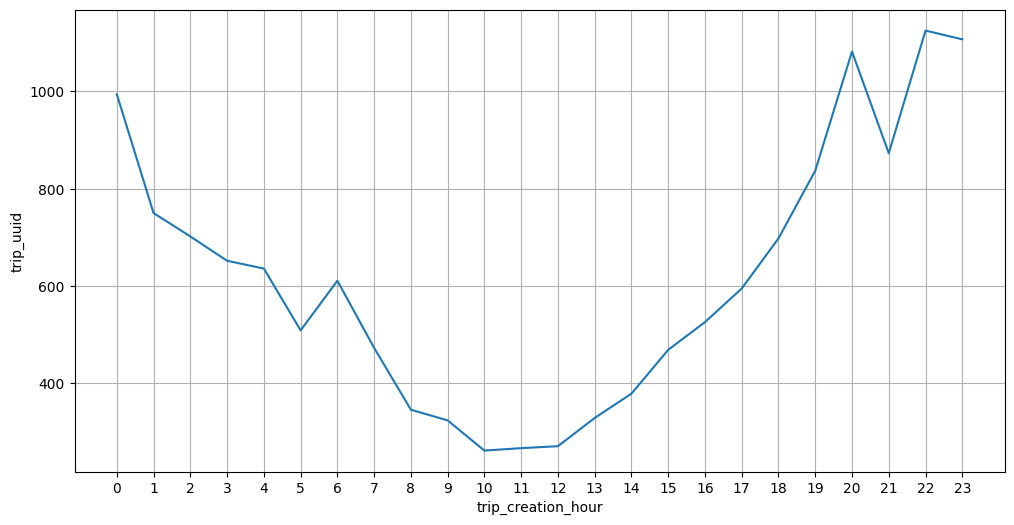

In [ ]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_hour,
             x = df_hour['trip_creation_hour'],
             y = df_hour['trip_uuid'],
             markers = '*')
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.plot()

Insights:
- It can inferred from the above graph that the number of trips is lowest at 10AM, which further increases from 12 and reachwes peak at 10 PM

In [ ]:
df2['trip_creation_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3], dtype=int8)

In [ ]:
df_day = df2.groupby(by = 'trip_creation_day')['trip_uuid'].count().to_frame().reset_index()
df_day.head()

trip_creation_day  trip_uuid
0                  1        605
1                  2        552
2                  3        631
3                 12        747
4                 13        750

[]

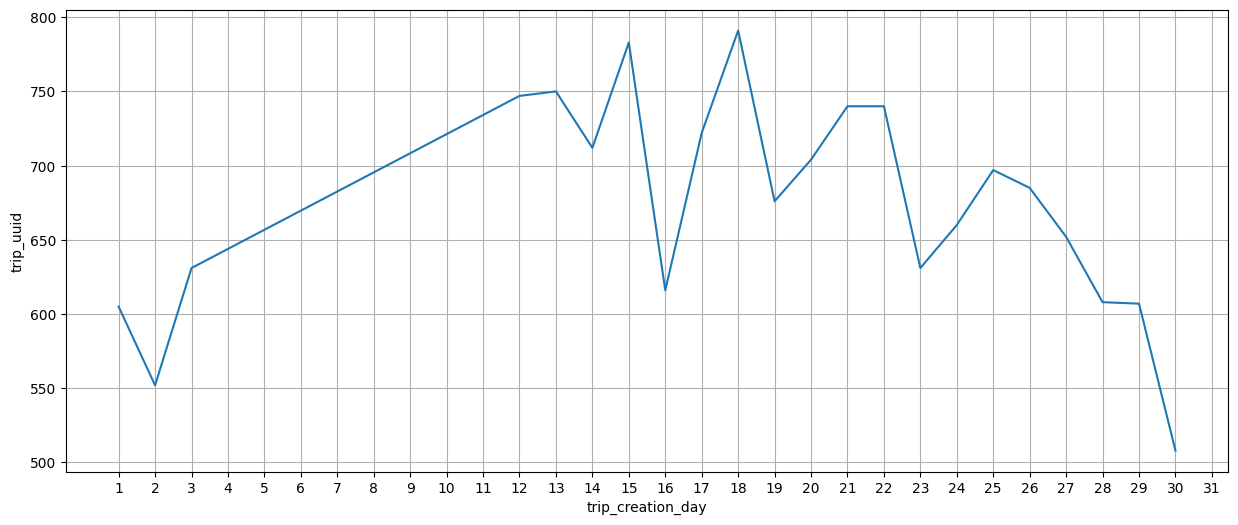

In [ ]:
plt.figure(figsize = (15, 6))
sns.lineplot(data = df_day,
             x = df_day['trip_creation_day'],
             y = df_day['trip_uuid'],
             markers = 'o')
plt.xticks(np.arange(1, 32))
plt.grid('both')
plt.plot()

Insights;
- Trip counts increase steadily over the early days, indicating growing delivery demand or expanded operations.
- The data reflects a non-linear, cyclical trend typical of real-world logistics influenced by multiple external and internal factors.
- The plot shows that the highest number of trips occur during the middle of the month, indicating that customer order activity peaks during this period.

Number of trips in given time period

In [ ]:
df_month = df2.groupby(by = 'trip_creation_month')['trip_uuid'].count().to_frame().reset_index()
df_month['perc'] = np.round(df_month['trip_uuid'] * 100/ df_month['trip_uuid'].sum(), 2)
df_month.head()

trip_creation_month  trip_uuid   perc
0                    9      13029  87.93
1                   10       1788  12.07

[]

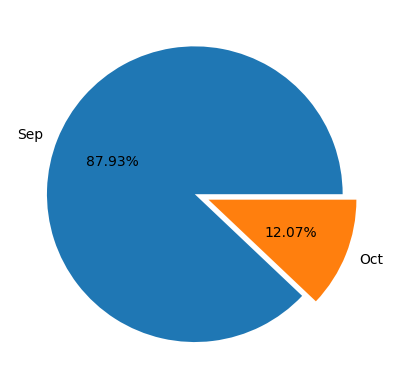

In [ ]:
plt.pie(x = df_month['trip_uuid'],
        labels = ['Sep', 'Oct'],
        explode = [0, 0.1],
       autopct = '%.2f%%')
plt.plot()

Insights:
- The vast majority of delivery trips (87.93%) occurred in one September period, while only 12.07% occurred in Octiber.

In [ ]:
#Distribution of route types for orders
df_route = df2.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
df_route['perc'] = np.round(df_route['trip_uuid'] * 100/ df_route['trip_uuid'].sum(), 2)
df_route.head()

route_type  trip_uuid   perc
0    Carting       8908  60.12
1        FTL       5909  39.88

[]

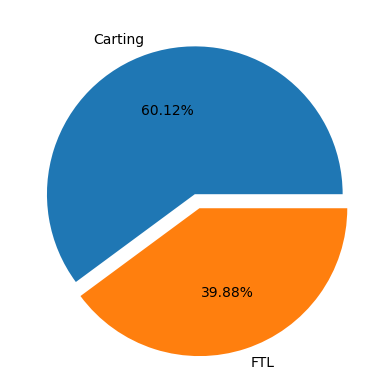

In [ ]:
plt.pie(x = df_route['trip_uuid'],
        labels = ['Carting', 'FTL'],
        explode = [0, 0.1],
        autopct = '%.2f%%')
plt.plot()

Insights

- Most deliveries (60.12%) are done using the Carting route type, highlighting a preference or operational need for smaller, more distributed trips. Meanwhile, FTL trips account for a significant 39.88%, likely used for bulk or long-distance deliveries.

In [ ]:
#number of trips in different states
df_source_state = df2.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False)
df_source_state.head()


source_state  trip_uuid   perc
17  Maharashtra       2714  18.32
14    Karnataka       2143  14.46
10      Haryana       1838  12.40
24   Tamil Nadu       1039   7.01
25    Telangana        781   5.27

[]

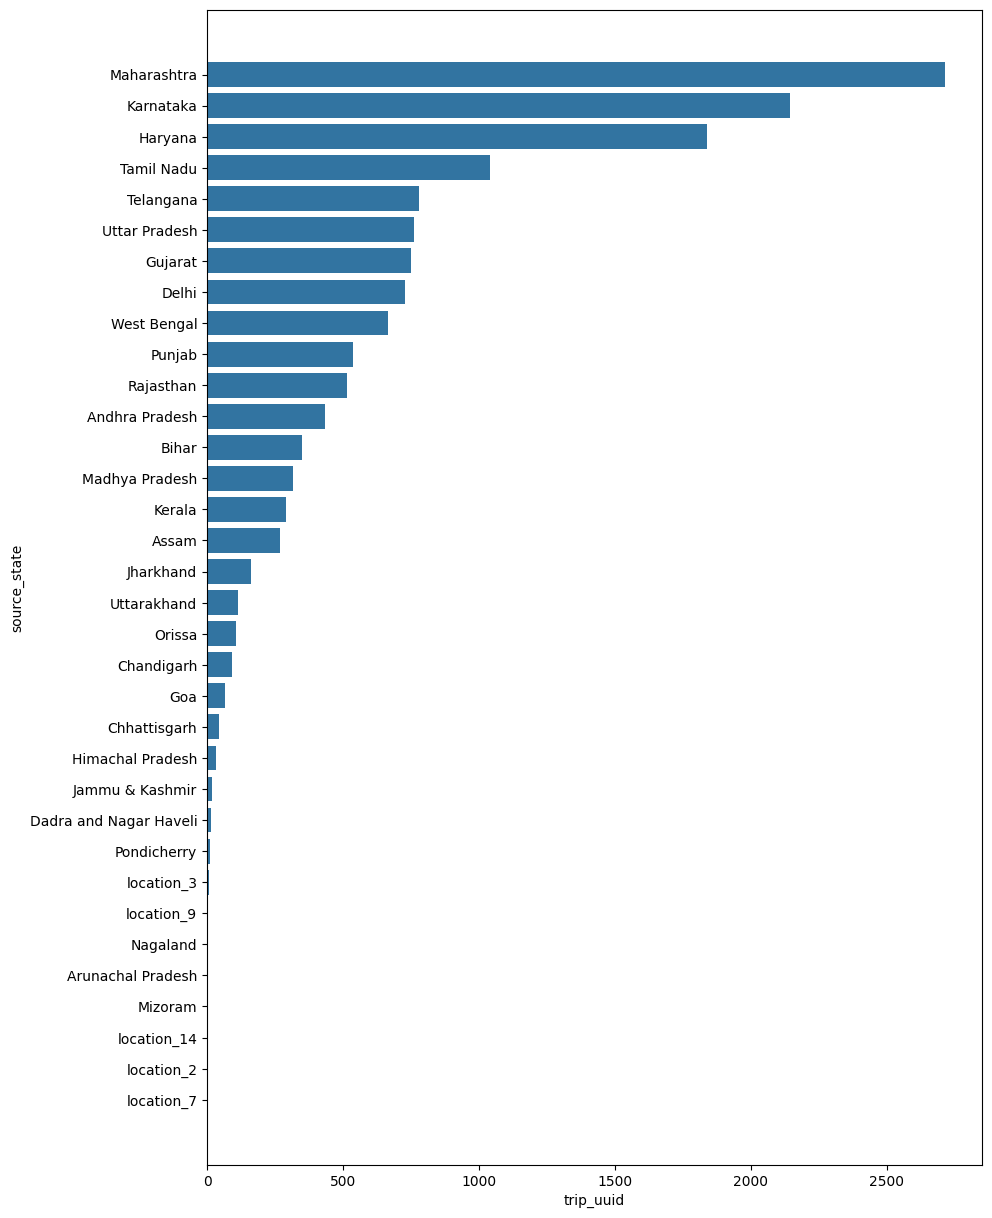

In [ ]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_source_state,
            x = df_source_state['trip_uuid'],
            y = df_source_state['source_state'])
plt.plot()

Insights:
- Maharashtra contributes the highest number of trips (18.32%), making it the most active source state in the delivery network.
- Karnataka and Haryana follow, with over 12% each — suggesting strong logistical activity in Southern and Northern regions.
- The majority of delivery trips originate from Maharashtra, Karnataka, and Haryana, which together account for nearly 45% of all trips. This indicates these states are key logistics hubs in the network.

In [ ]:
#Top cities based on the number of trips
df_source_city = df2.groupby(by = 'source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city['perc'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_source_city

source_city  trip_uuid  perc
439         Mumbai       1442  9.73
237        Gurgaon       1165  7.86
169          Delhi        883  5.96
79       Bengaluru        726  4.90
100       Bhiwandi        697  4.70
58       Bangalore        648  4.37
136        Chennai        568  3.83
264      Hyderabad        524  3.54
516           Pune        480  3.24
357        Kolkata        356  2.40
610        Sonipat        276  1.86
2        Ahmedabad        274  1.85
133     Chandigarh        273  1.84
270         Jaipur        259  1.75
201      Faridabad        227  1.53
447     Muzaffrpur        159  1.07
382       Ludhiana        158  1.07
320         Kanpur        145  0.98
621          Surat        140  0.94
473          Noida        129  0.87
102         Bhopal        125  0.84
240       Guwahati        118  0.80
679  Visakhapatnam         69  0.47
154     Coimbatore         69  0.47
380     LowerParel         65  0.44
477            PNQ         62  0.42
273      Jalandhar         54  0.36
220            Goa         52  0.35
25       Anantapur         51  0.34
261          Hubli         47  0.32

In [ ]:
df2['source_city'] = df2['source_city'].replace({'Bangalore': 'Bengaluru'})
city_trip_counts = df2.groupby('source_city')['trip_uuid'].count().reset_index()
city_trip_counts['perc'] = (city_trip_counts['trip_uuid'] * 100 / city_trip_counts['trip_uuid'].sum()).round(2)
top_cities = city_trip_counts.sort_values(by='trip_uuid', ascending=False).head(30)
top_cities

source_city  trip_uuid  perc
438         Mumbai       1442  9.73
78       Bengaluru       1374  9.27
236        Gurgaon       1165  7.86
168          Delhi        883  5.96
99        Bhiwandi        697  4.70
135        Chennai        568  3.83
263      Hyderabad        524  3.54
515           Pune        480  3.24
356        Kolkata        356  2.40
609        Sonipat        276  1.86
2        Ahmedabad        274  1.85
132     Chandigarh        273  1.84
269         Jaipur        259  1.75
200      Faridabad        227  1.53
446     Muzaffrpur        159  1.07
381       Ludhiana        158  1.07
319         Kanpur        145  0.98
620          Surat        140  0.94
472          Noida        129  0.87
101         Bhopal        125  0.84
239       Guwahati        118  0.80
678  Visakhapatnam         69  0.47
153     Coimbatore         69  0.47
379     LowerParel         65  0.44
476            PNQ         62  0.42
272      Jalandhar         54  0.36
219            Goa         52  0.35
25       Anantapur         51  0.34
260          Hubli         47  0.32
92        Bhatinda         47  0.32

[]

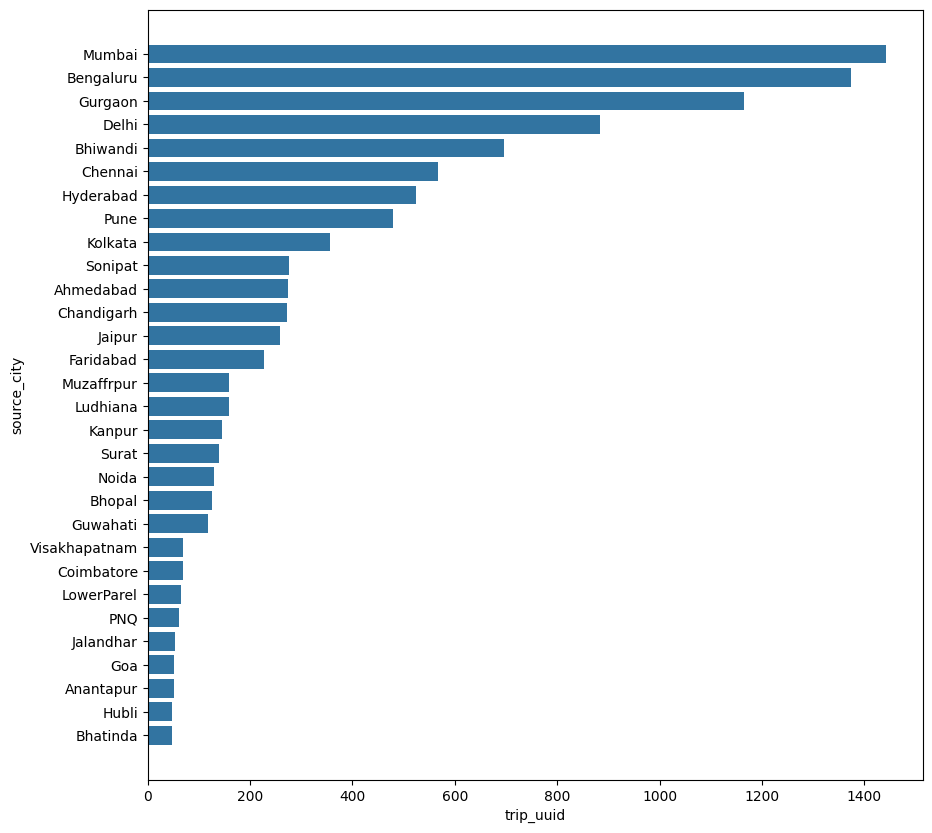

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = top_cities,
            x = top_cities['trip_uuid'],
            y = top_cities['source_city'])
plt.plot()

Insights:
 - The highest number of delivery trips originate from Mumbai (9.73%) and Bengaluru (9.27%), followed by Gurgaon and Delhi. This highlights the concentration of delivery operations in major metros and strategic logistics hubs across India.


In [ ]:
#Distribution of trips of destination states
df_destination_state = df2.groupby(by = 'destination_state')['trip_uuid'].count().to_frame().reset_index()
df_destination_state['perc'] = np.round(df_destination_state['trip_uuid'] * 100/ df_destination_state['trip_uuid'].sum(), 2)
df_destination_state = df_destination_state.sort_values(by = 'trip_uuid', ascending = False)
df_destination_state.head()

destination_state  trip_uuid   perc
18       Maharashtra       2561  17.28
15         Karnataka       2294  15.48
11           Haryana       1643  11.09
25        Tamil Nadu       1084   7.32
28     Uttar Pradesh        811   5.47

[]

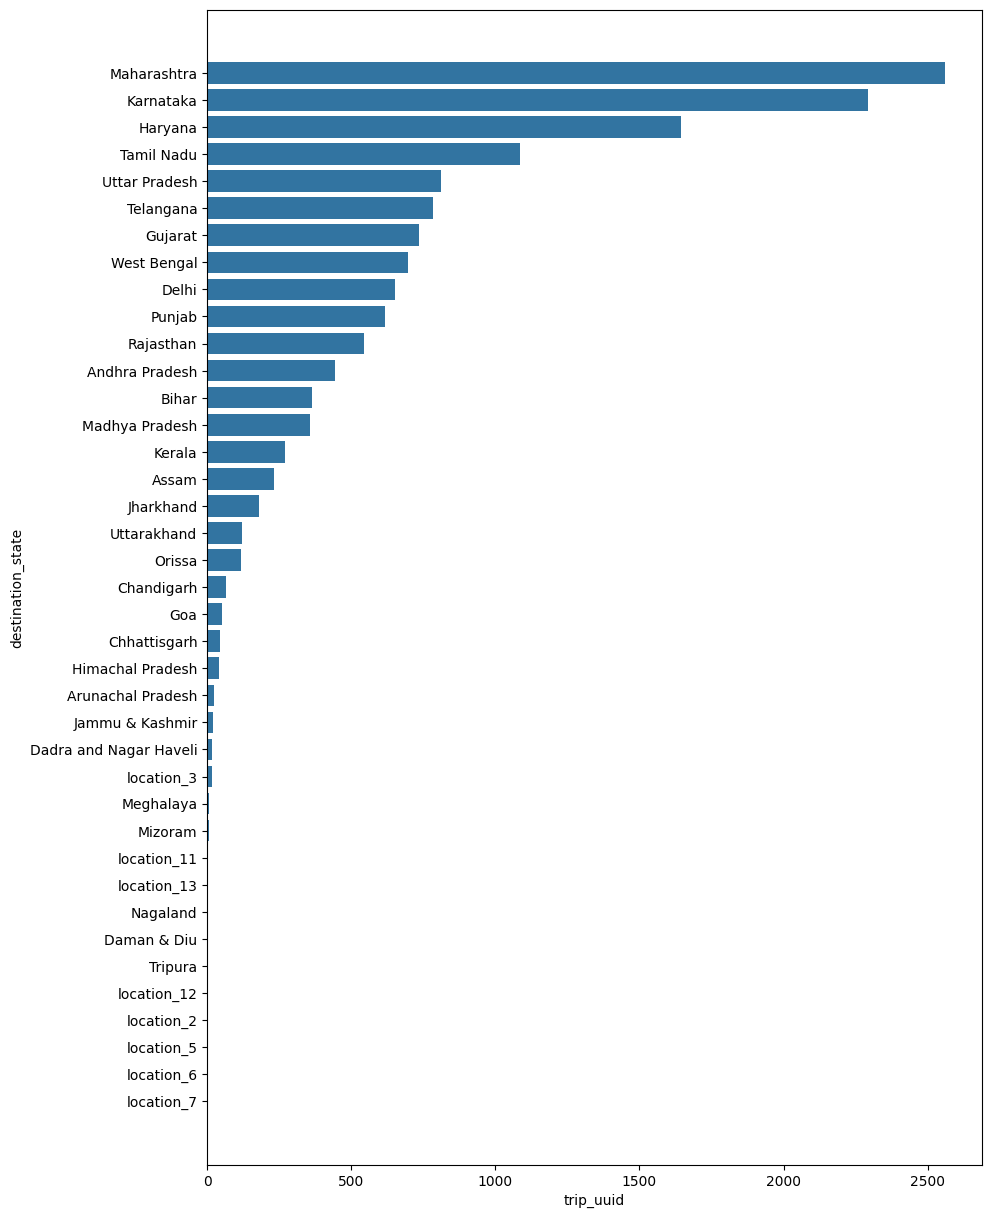

In [ ]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_destination_state,
            x = df_destination_state['trip_uuid'],
            y = df_destination_state['destination_state'])
plt.plot()

Insights:
- It can be seen in the above plot that maximum trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high in these states.

In [ ]:
 #Top destination cities
 df_destination_city = df2.groupby(by = 'destination_city')['trip_uuid'].count().to_frame().reset_index()
 df2['destination_city'] = df2['destination_city'].replace({'Bangalore': 'Bengaluru'})
df_destination_city['perc'] = np.round(df_destination_city['trip_uuid'] * 100/ df_destination_city['trip_uuid'].sum(), 2)
df_destination_city = df_destination_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_destination_city

destination_city  trip_uuid   perc
515           Mumbai       1548  10.45
96         Bengaluru        975   6.58
282          Gurgaon        936   6.32
200            Delhi        778   5.25
163          Chennai        595   4.02
72         Bangalore        551   3.72
308        Hyderabad        503   3.39
115         Bhiwandi        434   2.93
418          Kolkata        384   2.59
158       Chandigarh        339   2.29
724          Sonipat        322   2.17
612             Pune        317   2.14
4          Ahmedabad        265   1.79
242        Faridabad        244   1.65
318           Jaipur        205   1.38
371           Kanpur        148   1.00
117           Bhopal        139   0.94
559              PNQ        122   0.82
739            Surat        117   0.79
552            Noida        106   0.72
521       Muzaffrpur        102   0.69
284         Guwahati         98   0.66
448         Ludhiana         70   0.47
797    Visakhapatnam         64   0.43
259        Ghaziabad         56   0.38
208          Dhanbad         50   0.34
639           Ranchi         49   0.33
110         Bhatinda         48   0.32
183       Coimbatore         47   0.32
9              Akola         45   0.30

[]

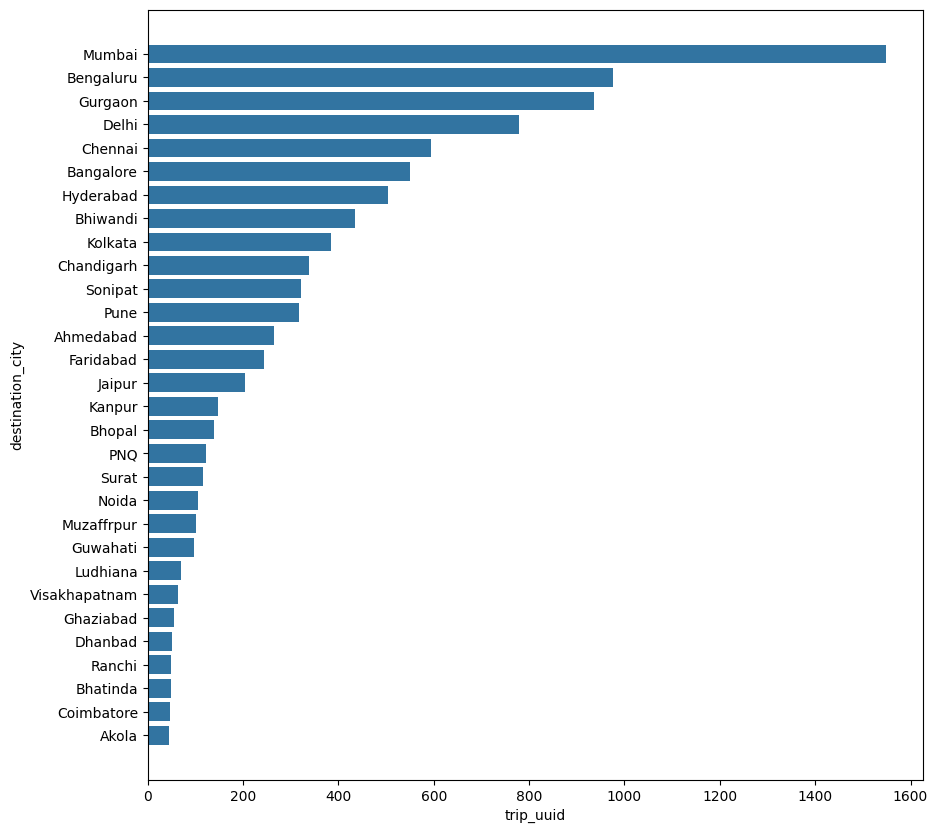

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_destination_city,
            x = df_destination_city['trip_uuid'],
            y = df_destination_city['destination_city'])
plt.plot()

Insights:
- 	Deliveries are most frequently sent to Mumbai (10.45%) and Bengaluru (10.30%), followed by Gurgaon and Delhi. This reflects strong demand and logistical infrastructure in India’s major metro regions, while key warehousing zones also attract a significant share of deliveries.


[]

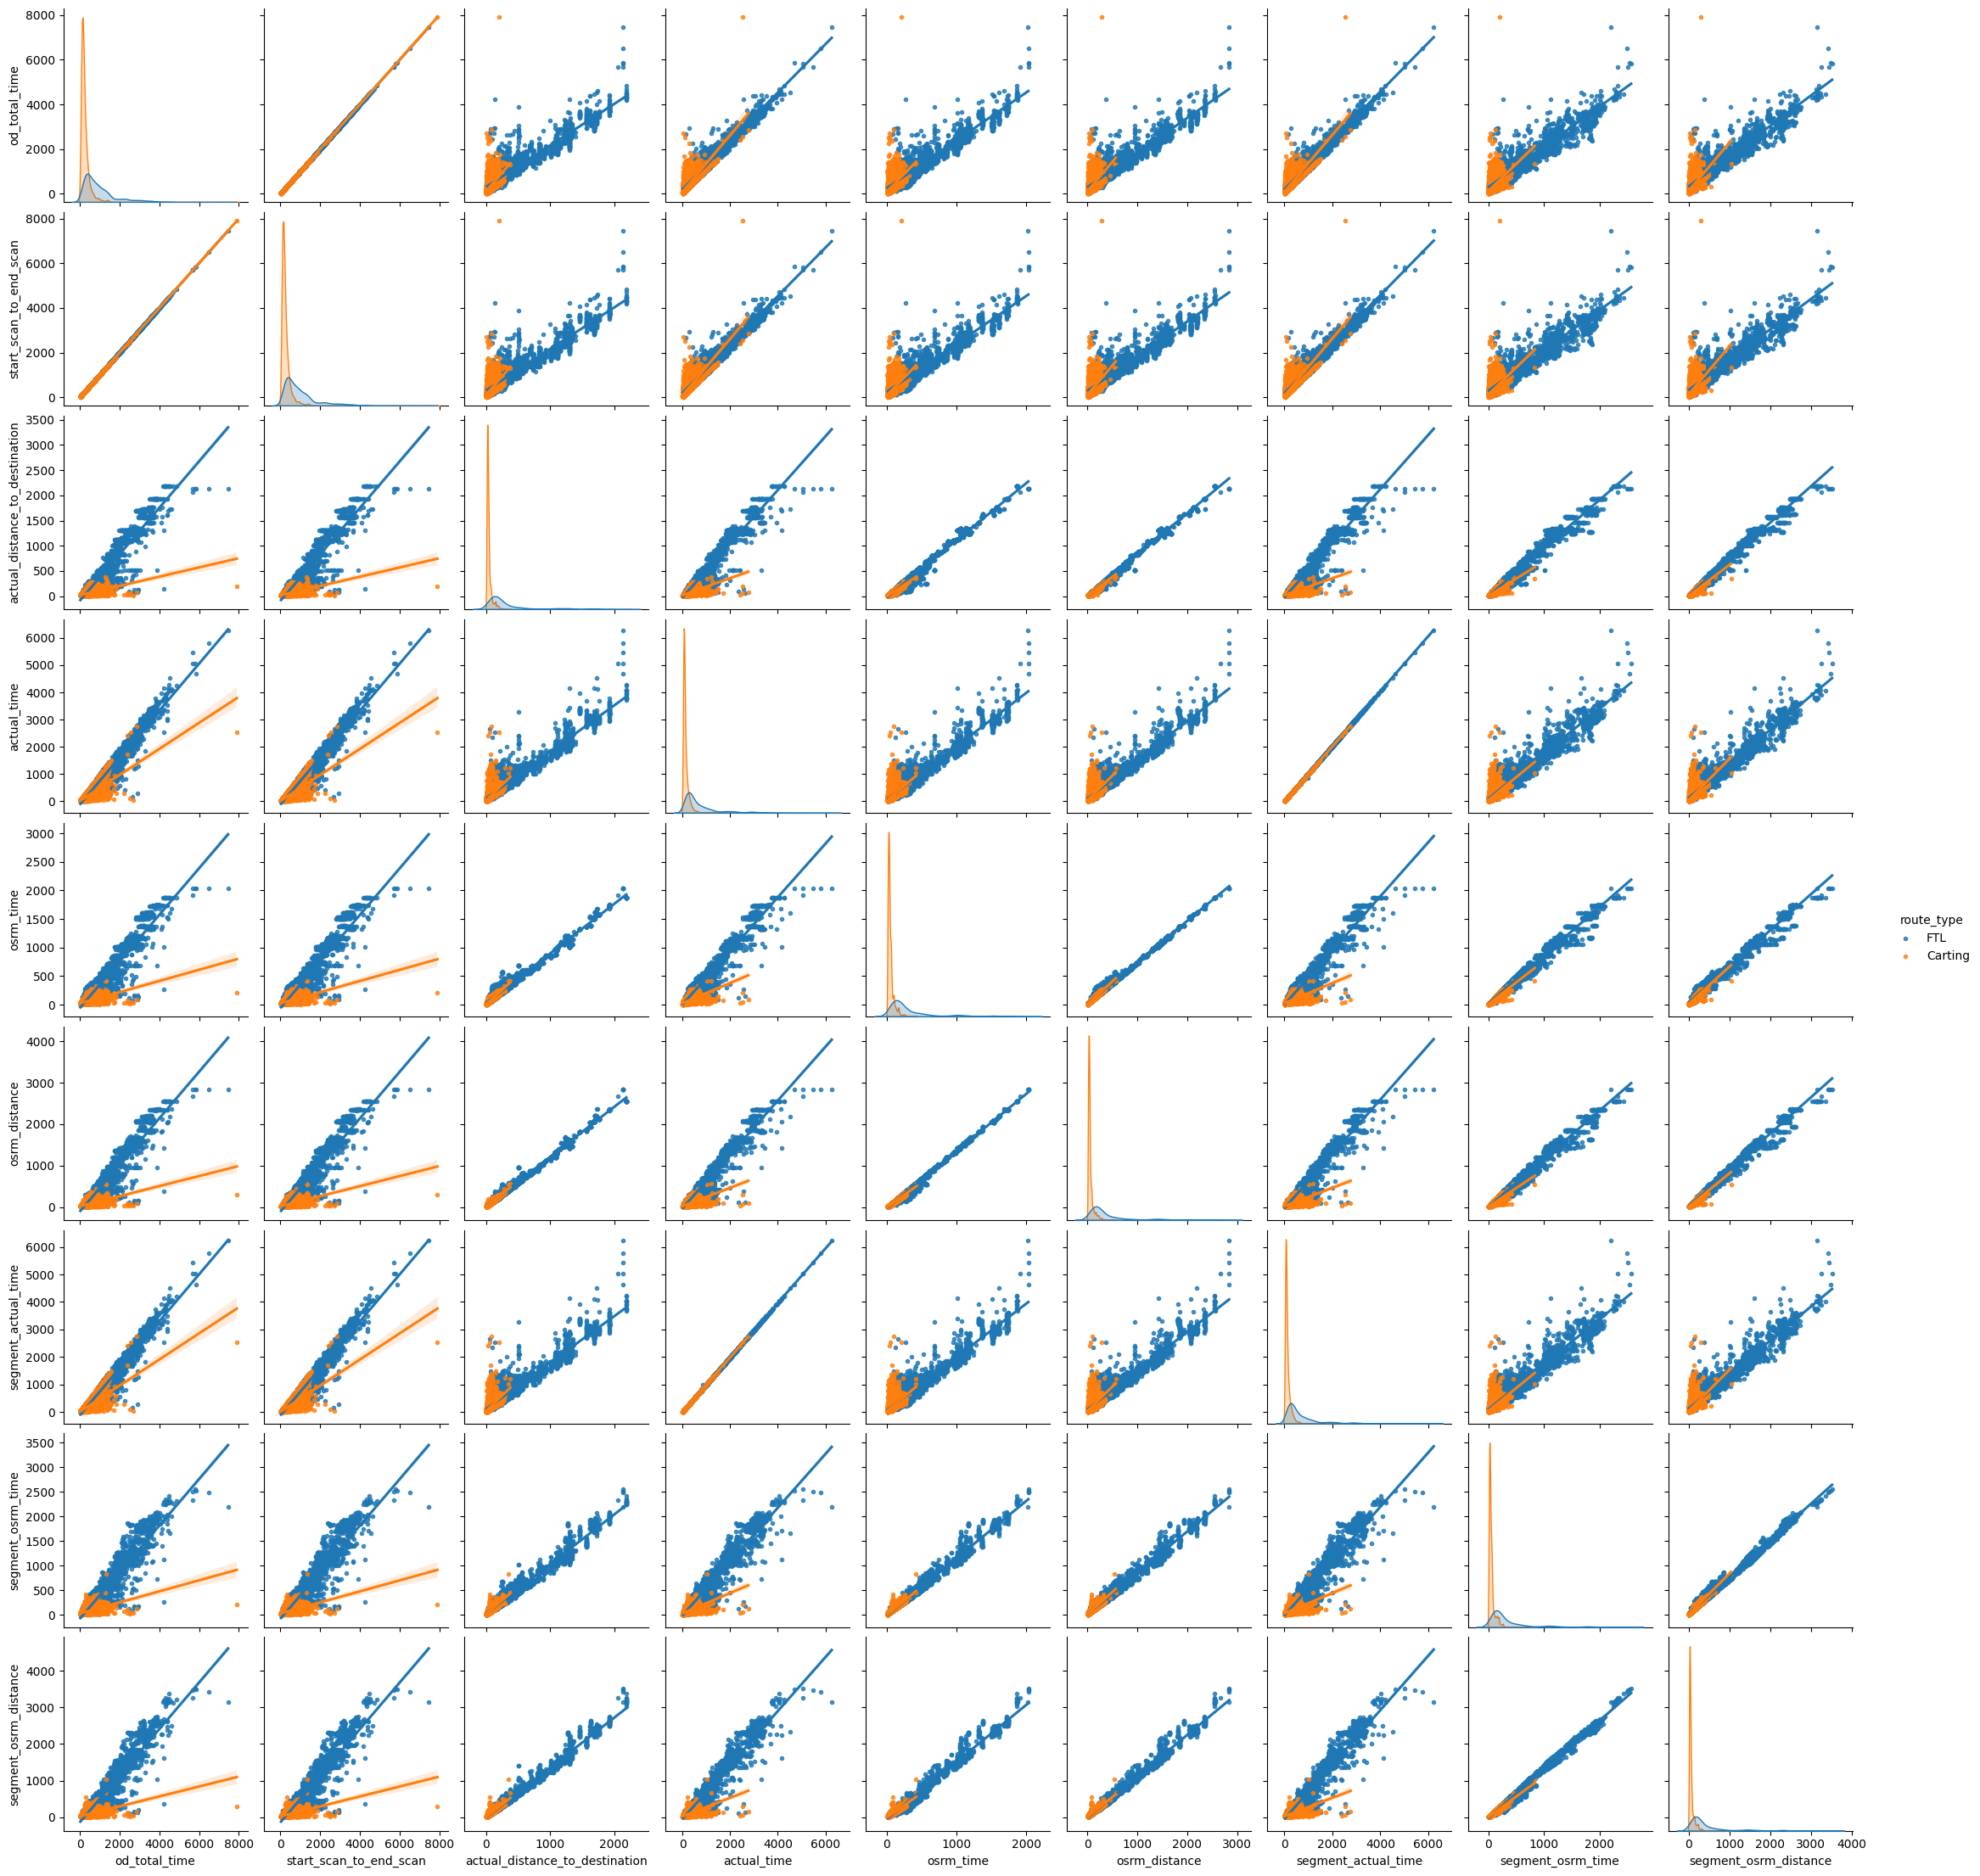

In [ ]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
sns.pairplot(data = df2,
             vars = numerical_columns,
             kind = 'reg',
             hue = 'route_type',
             markers = '.')
plt.plot()

In [ ]:
df_corr = df2[numerical_columns].corr()
df_corr

od_total_time  start_scan_to_end_scan  \
od_total_time                        1.000000                0.999999   
start_scan_to_end_scan               0.999999                1.000000   
actual_distance_to_destination       0.918222                0.918308   
actual_time                          0.961094                0.961147   
osrm_time                            0.926516                0.926571   
osrm_distance                        0.924219                0.924299   
segment_actual_time                  0.961119                0.961171   
segment_osrm_time                    0.918490                0.918561   
segment_osrm_distance                0.919199                0.919291   

                                actual_distance_to_destination  actual_time  \
od_total_time                                         0.918222     0.961094   
start_scan_to_end_scan                                0.918308     0.961147   
actual_distance_to_destination                        1.000000     0.953757   
actual_time                                           0.953757     1.000000   
osrm_time                                             0.993561     0.958593   
osrm_distance                                         0.997264     0.959214   
segment_actual_time                                   0.952821     0.999989   
segment_osrm_time                                     0.987538     0.953872   
segment_osrm_distance                                 0.993061     0.956967   

                                osrm_time  osrm_distance  segment_actual_time  \
od_total_time                    0.926516       0.924219             0.961119   
start_scan_to_end_scan           0.926571       0.924299             0.961171   
actual_distance_to_destination   0.993561       0.997264             0.952821   
actual_time                      0.958593       0.959214             0.999989   
osrm_time                        1.000000       0.997580             0.957765   
osrm_distance                    0.997580       1.000000             0.958353   
segment_actual_time              0.957765       0.958353             1.000000   
segment_osrm_time                0.993259       0.991798             0.953039   
segment_osrm_distance            0.991608       0.994710             0.956106   

                                segment_osrm_time  segment_osrm_distance  
od_total_time                            0.918490               0.919199  
start_scan_to_end_scan                   0.918561               0.919291  
actual_distance_to_destination           0.987538               0.993061  
actual_time                              0.953872               0.956967  
osrm_time                                0.993259               0.991608  
osrm_distance                            0.991798               0.994710  
segment_actual_time                      0.953039               0.956106  
segment_osrm_time                        1.000000               0.996092  
segment_osrm_distance                    0.996092               1.000000

[]

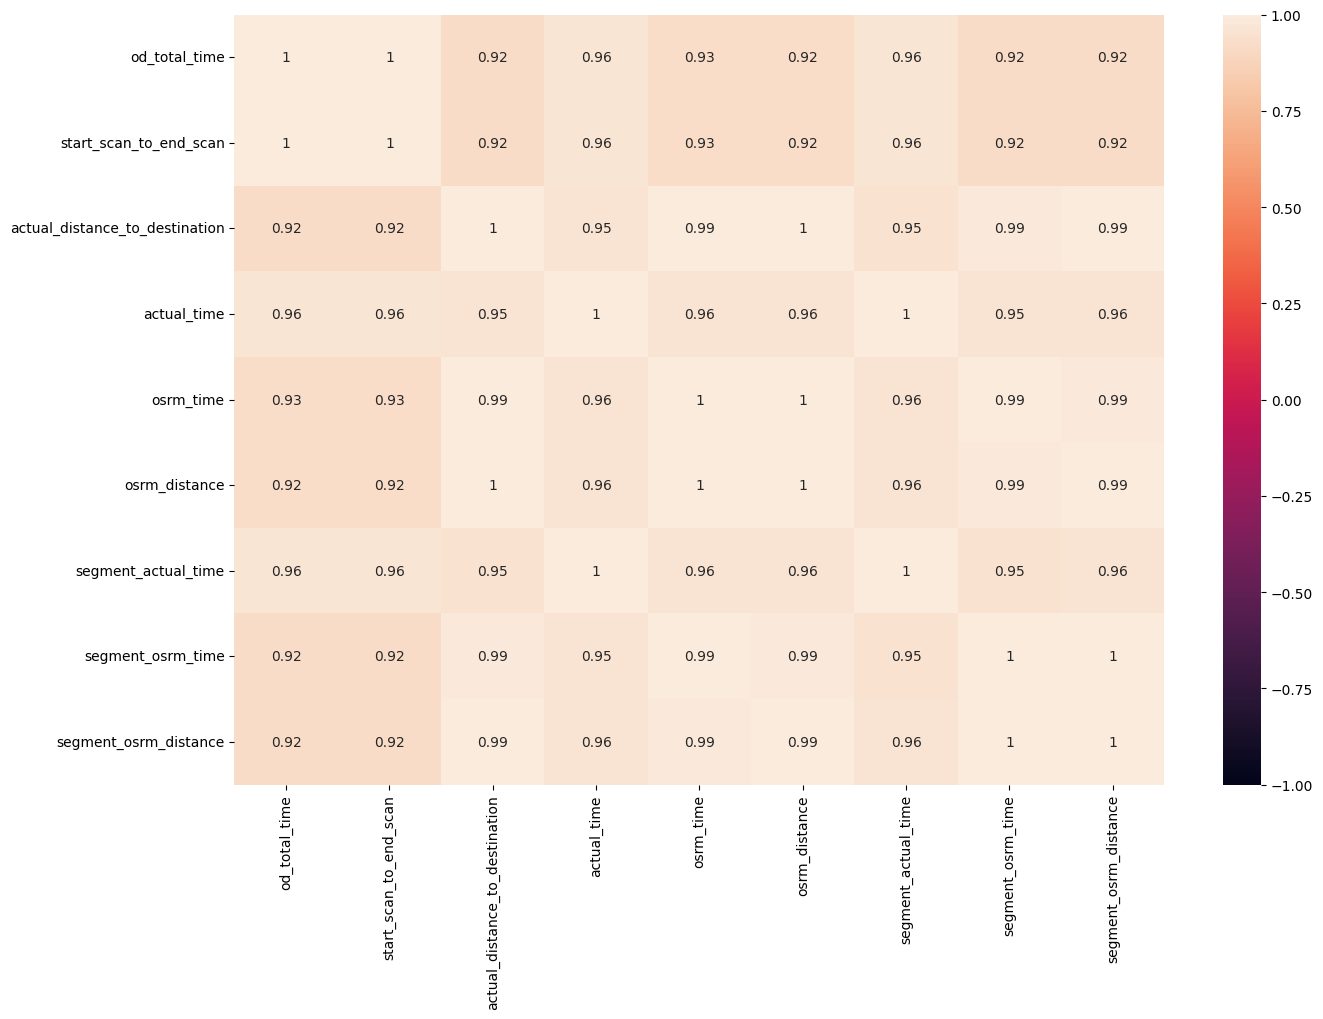

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.plot()

Insights:
- Time and distance metrics are highly consistent internally and with OSRM estimates.

## In-depth Analysis

## 1. Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

 **Null Hypothesis ( H0 )** - od_total_time (Total Trip Time) and  start_scan_to_end_scan (Expected total trip time) are same.

**Alternate Hypothesis ( HA )** - od_total_time (Total Trip Time) and  start_scan_to_end_scan (Expected total trip time) are different.


In [ ]:
df2[['od_total_time', 'start_scan_to_end_scan']].describe()

od_total_time  start_scan_to_end_scan
count   14817.000000            14817.000000
mean      531.697630              530.809998
std       658.868223              658.707031
min        23.460000               23.000000
25%       149.930000              149.000000
50%       280.770000              280.000000
75%       638.200000              637.000000
max      7898.550000             7898.000000

[]

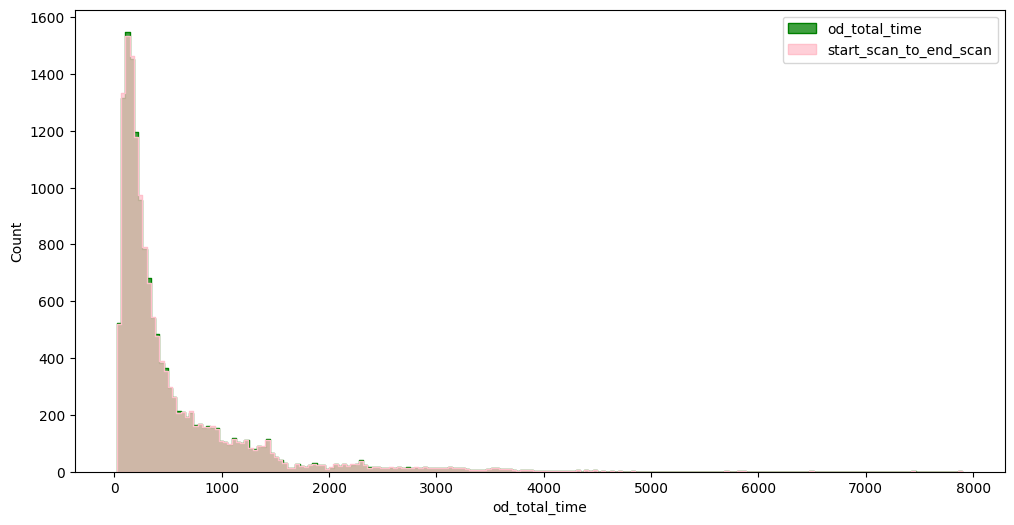

In [ ]:
#Check for normal distribution of the data
plt.figure(figsize = (12, 6))
sns.histplot(df2['od_total_time'], element = 'step', color = 'green')
sns.histplot(df2['start_scan_to_end_scan'], element = 'step', color = 'pink')
plt.legend(['od_total_time', 'start_scan_to_end_scan'])
plt.plot()

[]

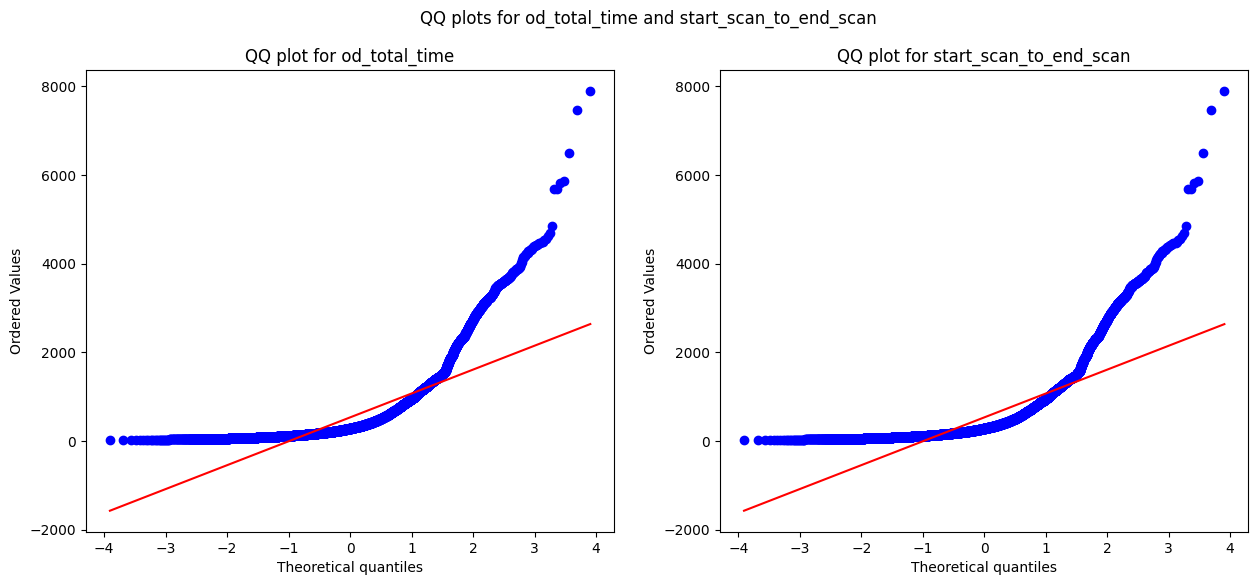

In [ ]:
#QQ Plot test
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')
spy.probplot(df2['od_total_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for od_total_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['start_scan_to_end_scan'], plot = plt, dist = 'norm')
plt.title('QQ plot for start_scan_to_end_scan')
plt.plot()

Insights:
The data doesn't follow normal distribution.

Shipiro wilk test

$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

In [ ]:
test_stat, p_value = spy.shapiro(df2['od_total_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.158966198999207e-71
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['start_scan_to_end_scan'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.327478808344083e-71
The sample does not follow normal distribution


Applying Box-Cox transformation to assess whether the resulting data follows a normal distribution

In [ ]:
transformed_od_total_time = spy.boxcox(df2['od_total_time'])[0]
test_stat, p_value = spy.shapiro(transformed_od_total_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.500452011410083e-25
The sample does not follow normal distribution


In [ ]:
transformed_start_scan_to_end_scan = spy.boxcox(df2['start_scan_to_end_scan'])[0]
test_stat, p_value = spy.shapiro(transformed_start_scan_to_end_scan)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0827564678748062e-24
The sample does not follow normal distribution


Despite applying the Box-Cox transformation to both ‘od_total_time’ and ‘start_scan_to_end_scan’, the distributions remain non-normal

### Homogeneity of Variances using **Lavene's test**
Null Hypothesis(H0) - Homogenous Variance

Alternate Hypothesis(HA) - Non Homogenous Variance

In [ ]:
test_stat, p_value = spy.levene(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.9668007217581142
The samples have Homogenous Variance 


In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('P-value :',p_value)

P-value : 0.7815123224221716


Insights:
Since p-value > alpha therfore it can be concluded that od_total_time and start_scan_to_end_scan are similar.

## 2. Do hypothesis testing / visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [ ]:
df2[['actual_time', 'osrm_time']].describe()

actual_time     osrm_time
count  14817.000000  14817.000000
mean     357.143768    161.384018
std      561.395020    271.362549
min        9.000000      6.000000
25%       67.000000     29.000000
50%      149.000000     60.000000
75%      370.000000    168.000000
max     6265.000000   2032.000000

[]

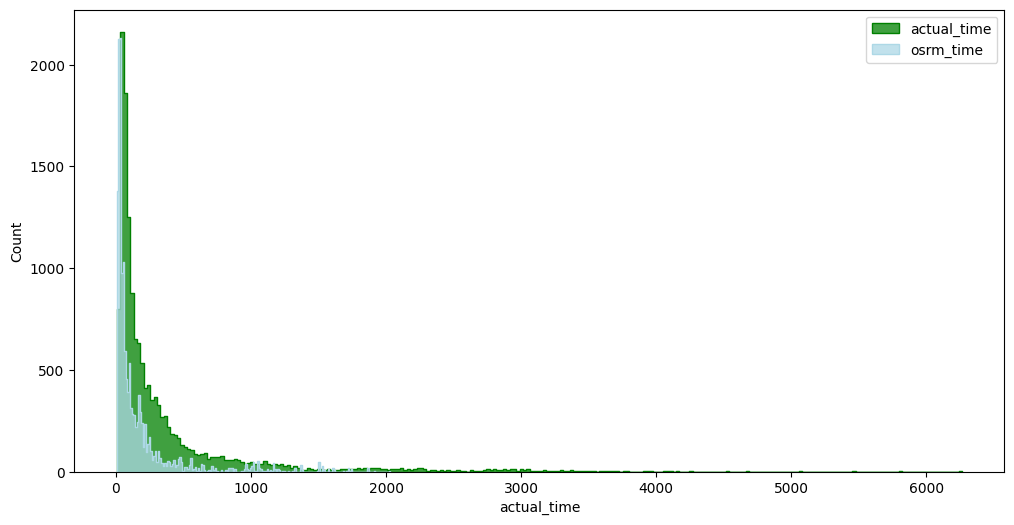

In [ ]:
#check for normal distribution
plt.figure(figsize = (12, 6))
sns.histplot(df2['actual_time'], element = 'step', color = 'green')
sns.histplot(df2['osrm_time'], element = 'step', color = 'lightblue')
plt.legend(['actual_time', 'osrm_time'])
plt.plot()

[]

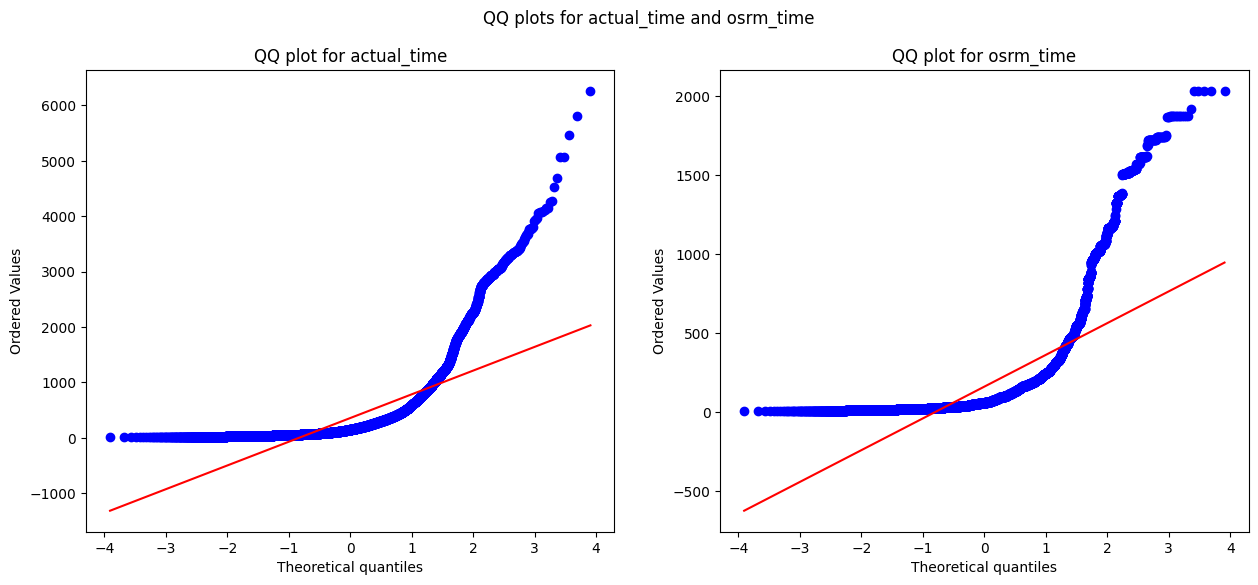

In [ ]:
## QQ Plot
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
spy.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

Insights: The samples don't follow normal distribution

Shapiro Wilk test to test normality

$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05


In [ ]:
test_stat, p_value = spy.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0505566572422659e-76
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.496399251820208e-78
The sample does not follow normal distribution


Applying Box-Cox transformation to assess whether the resulting data follows a normal distribution

In [ ]:
transformed_actual_time = spy.boxcox(df2['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0605361865832227e-28
The sample does not follow normal distribution


In [ ]:
transformed_osrm_time = spy.boxcox(df2['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.525644674083824e-35
The sample does not follow normal distribution


Insights: Despite applying boxcox transformation, the data do not follow normal distribution

Homogeneity of variances using Lavene's Test

In [ ]:
test_stat, p_value = spy.levene(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.871297993683208e-220
The samples do not have  Homogenous Variance


As the data does not meet the assumptions of a T-Test, the appropriate alternative is the Mann-Whitney U test, which compares two independent samples without assuming normality.

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.0
The samples are not similar


Insights: As the p-value falls below the chosen alpha level, we can conclude that ‘actual_time’ and ‘osrm_time’ are statistically different

## 	Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [ ]:
df2[['actual_time', 'segment_actual_time']].describe()

actual_time  segment_actual_time
count  14817.000000         14817.000000
mean     357.143768           353.892273
std      561.395020           556.246826
min        9.000000             9.000000
25%       67.000000            66.000000
50%      149.000000           147.000000
75%      370.000000           367.000000
max     6265.000000          6230.000000

[]

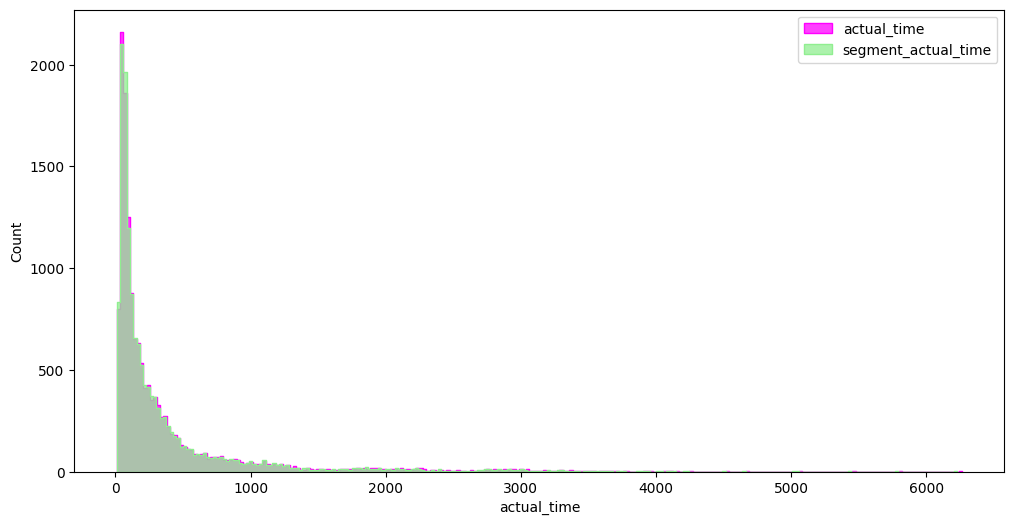

In [ ]:
#Tests to check normal distribution
plt.figure(figsize = (12, 6))
sns.histplot(df2['actual_time'], element = 'step', color = 'magenta')
sns.histplot(df2['segment_actual_time'], element = 'step', color = 'lightgreen')
plt.legend(['actual_time', 'segment_actual_time'])
plt.plot()

[]

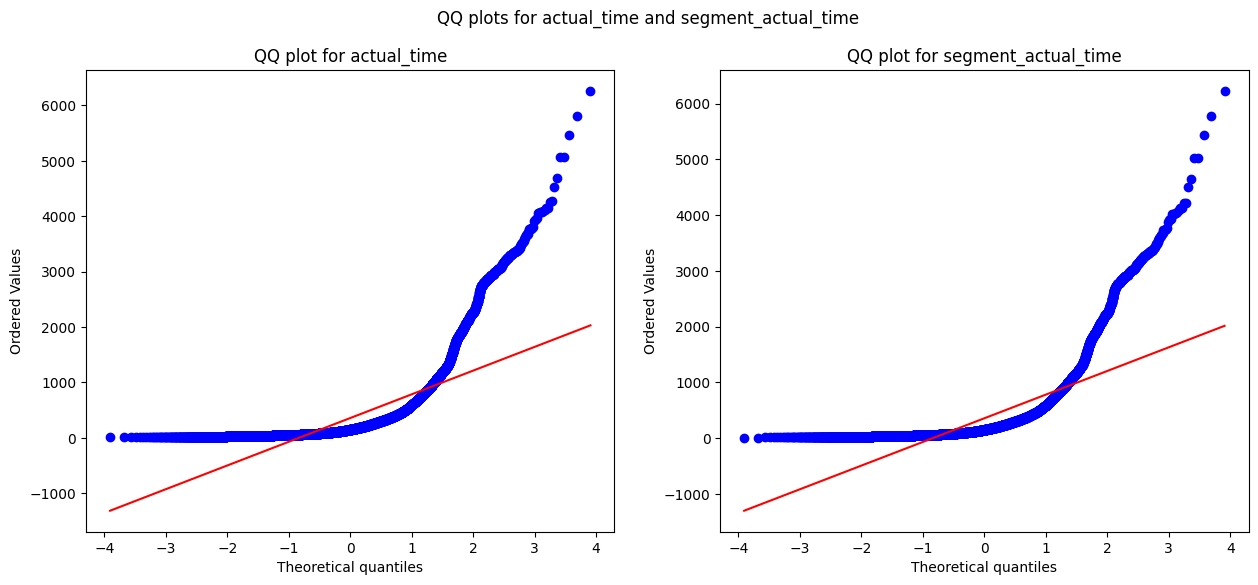

In [ ]:
# QQ Plot
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
spy.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

Insights: The data samples do not follow normal distribution

  Applying Shapiro-Wilk test for normality

 $H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

In [ ]:
test_stat, p_value = spy.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.8008389335314487e-76
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.6441561071187322e-76
The sample does not follow normal distribution


Applying Box-Cox transformation to assess whether the resulting data follows a normal distribution.

In [ ]:
transformed_actual_time = spy.boxcox(df2['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0605361865832227e-28
The sample does not follow normal distribution


In [ ]:
transformed_segment_actual_time = spy.boxcox(df2['segment_actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.938231499945463e-29
The sample does not follow normal distribution


Insights: Even after applying the boxcox transformation on each of the "actual_time" and "segment_actual_time" columns, the distributions do not follow normal distribution.

Homogeneity of Variances using **Lavene's test**

Null Hypothesis(H0) - Homogenous Variance
Alternate Hypothesis(HA) - Non Homogenous Variance

In [ ]:
test_stat, p_value = spy.levene(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.6955022668700895
The samples have Homogenous Variance 


As the data does not follow a normal distribution, we cannot use the T-Test and instead opt for the Mann-Whitney U test, which is appropriate for comparing two independent non-parametric samples.

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.4164235159622476
The samples are similar 


Since the p-value is greater than the significance level (α), we fail to reject the null hypothesis and conclude that ‘actual_time’ and ‘segment_actual_time’ are statistically similar

## Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [ ]:
df2[['osrm_distance', 'segment_osrm_distance']].describe()

osrm_distance  segment_osrm_distance
count   14817.000000           14817.000000
mean      204.344711             223.201157
std       370.395508             416.628326
min         9.072900               9.072900
25%        30.819201              32.654499
50%        65.618805              70.154404
75%       208.475006             218.802399
max      2840.081055            3523.632324

[]

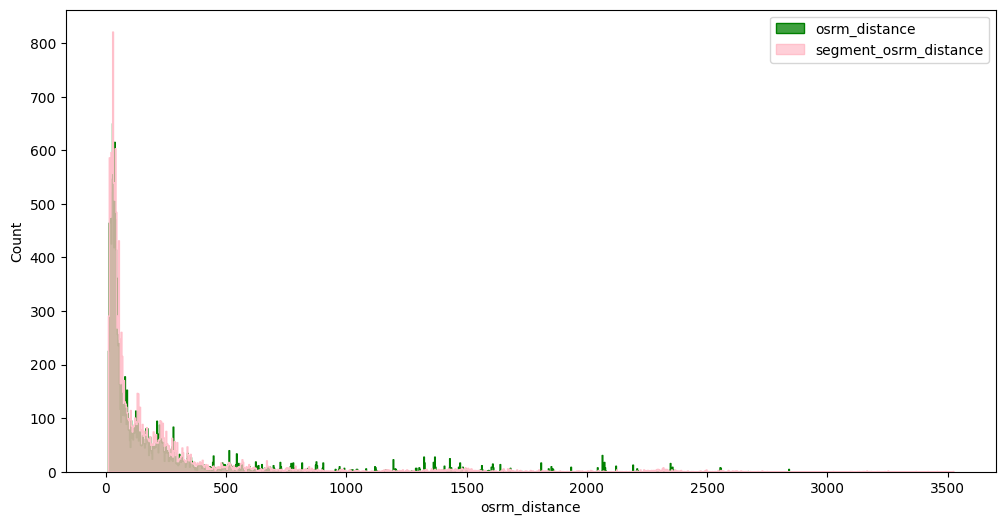

In [ ]:
#Test to chack the normal distribution
plt.figure(figsize = (12, 6))
sns.histplot(df2['osrm_distance'], element = 'step', color = 'green', bins = 1000)
sns.histplot(df2['segment_osrm_distance'], element = 'step', color = 'pink', bins = 1000)
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.plot()

[]

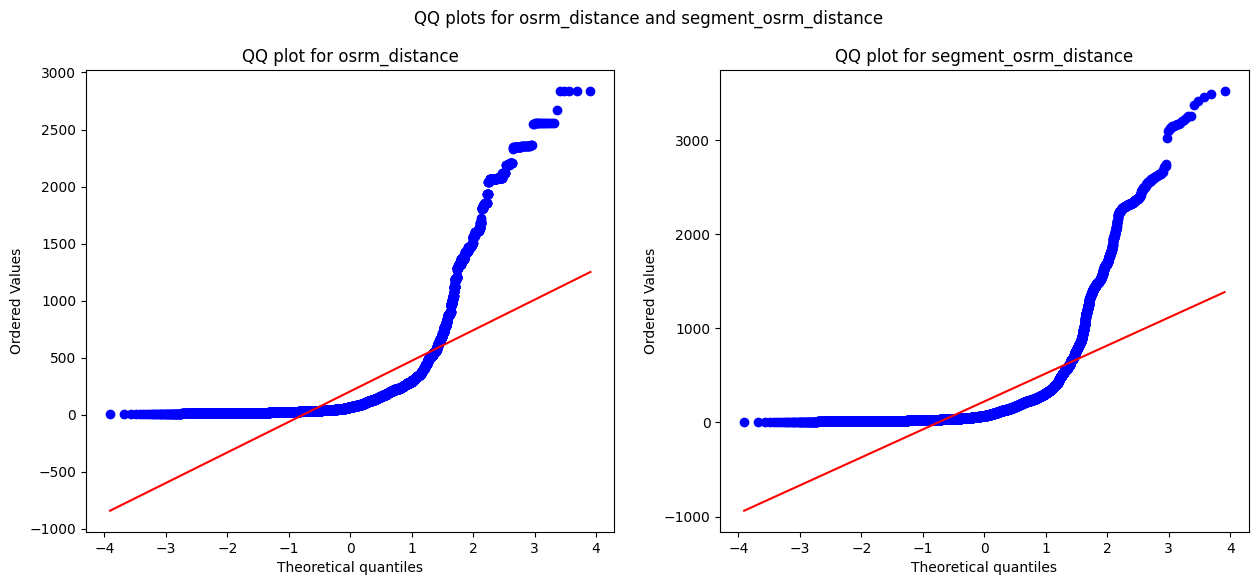

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
spy.probplot(df2['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()

Insights: With the above plot we can conclude that data doesn't follow normal distribution

Applying Shapiro wilk test to check for the normal distribution

$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

In [ ]:
test_stat, p_value = spy.shapiro(df2['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.781005005696312e-79
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.845865488552719e-80
The sample does not follow normal distribution


 Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [ ]:
transformed_osrm_distance = spy.boxcox(df2['osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.106940835518284e-41
The sample does not follow normal distribution


In [ ]:
transformed_segment_osrm_distance = spy.boxcox(df2['segment_osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.056390469546483e-38
The sample does not follow normal distribution


Insights: Despite applying the boxcox transformation on each of the "osrm_distance" and "segment_osrm_distance" columns, the distributions do not follow normal distribution.

Homogeneity of Variances using **Lavene's test**

In [ ]:
test_stat, p_value = spy.levene(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.00020976355663265204
The samples do not have Homogenous Variance


As the samples violate the assumptions required for a T-Test, it is not appropriate in this case. Instead, we use the Mann-Whitney U rank test, a non-parametric alternative for comparing two independent samples.

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 9.509410818847664e-07
The samples are not similar


Since the p-value is less than the significance level (α), we reject the null hypothesis and conclude that ‘osrm_distance’ and ‘segment_osrm_distance’ are significantly different

# Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [ ]:
df2[['osrm_time', 'segment_osrm_time']].describe().T

count        mean         std  min   25%   50%    75%  \
osrm_time          14817.0  161.384018  271.362549  6.0  29.0  60.0  168.0   
segment_osrm_time  14817.0  180.949783  314.541412  6.0  31.0  65.0  185.0   

                      max  
osrm_time          2032.0  
segment_osrm_time  2564.0

[]

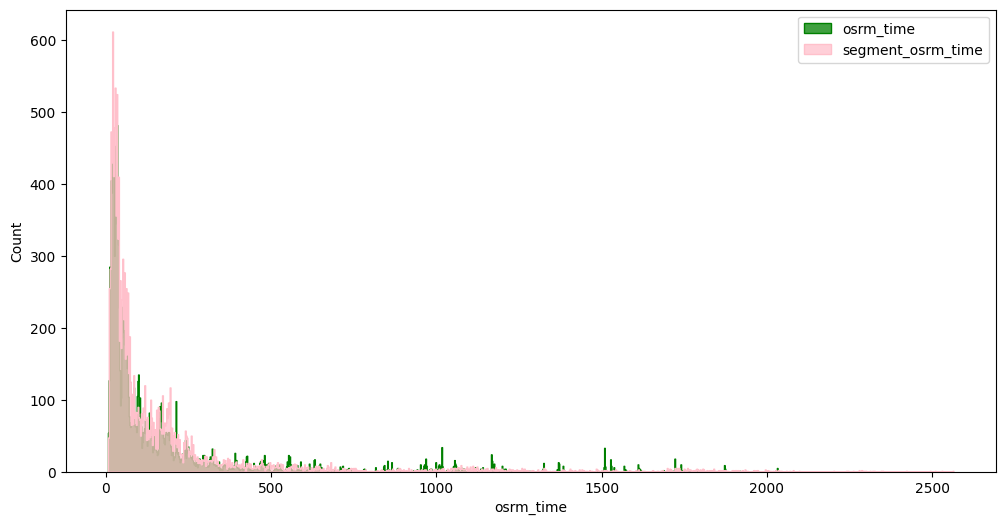

In [ ]:
# Test to verify the normal distribution
plt.figure(figsize = (12, 6))
sns.histplot(df2['osrm_time'], element = 'step', color = 'green', bins = 1000)
sns.histplot(df2['segment_osrm_time'], element = 'step', color = 'pink', bins = 1000)
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.plot()

[]

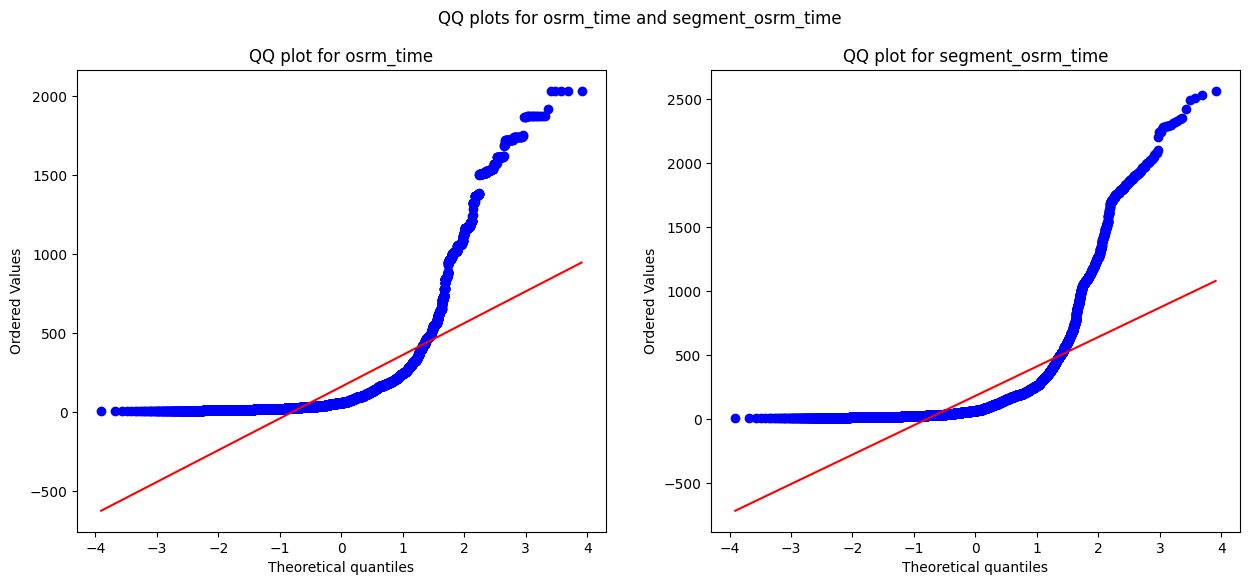

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
spy.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

Insights: With the above plots we can conclude that the data does not follow the normal distribution.

Applying Shapiro-Wilk test for normality

$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

In [ ]:
test_stat, p_value = spy.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


p-value 3.392707020179516e-78
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.890147757774123e-79
The sample does not follow normal distribution


Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [ ]:
transformed_osrm_time = spy.boxcox(df2['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.525644674083824e-35
The sample does not follow normal distribution


In [ ]:
transformed_segment_osrm_time = spy.boxcox(df2['segment_osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.899366703438002e-34
The sample does not follow normal distribution


Despite applying the boxcox transformation on each of the "osrm_time" and "segment_osrm_time" columns, the distributions do not follow normal distribution.

Homogeneity of Variances using **Lavene's test**

In [ ]:
test_stat, p_value = spy.levene(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 8.349482669010088e-08
The samples do not have Homogenous Variance


Insights: Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 2.2995370859748865e-08
The samples are not similar


Insights: As the p-value is below alpha, it indicates a statistically significant difference between ‘osrm_time’ and ‘segment_osrm_time’

## 	Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [ ]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
df2[numerical_columns].describe().T

count        mean         std        min  \
od_total_time                   14817.0  531.697630  658.868223  23.460000   
start_scan_to_end_scan          14817.0  530.809998  658.707031  23.000000   
actual_distance_to_destination  14817.0  164.477829  305.388123   9.002461   
actual_time                     14817.0  357.143768  561.395020   9.000000   
osrm_time                       14817.0  161.384018  271.362549   6.000000   
osrm_distance                   14817.0  204.344711  370.395508   9.072900   
segment_actual_time             14817.0  353.892273  556.246826   9.000000   
segment_osrm_time               14817.0  180.949783  314.541412   6.000000   
segment_osrm_distance           14817.0  223.201157  416.628326   9.072900   

                                       25%         50%         75%  \
od_total_time                   149.930000  280.770000  638.200000   
start_scan_to_end_scan          149.000000  280.000000  637.000000   
actual_distance_to_destination   22.837238   48.474072  164.583206   
actual_time                      67.000000  149.000000  370.000000   
osrm_time                        29.000000   60.000000  168.000000   
osrm_distance                    30.819201   65.618805  208.475006   
segment_actual_time              66.000000  147.000000  367.000000   
segment_osrm_time                31.000000   65.000000  185.000000   
segment_osrm_distance            32.654499   70.154404  218.802399   

                                        max  
od_total_time                   7898.550000  
start_scan_to_end_scan          7898.000000  
actual_distance_to_destination  2186.531738  
actual_time                     6265.000000  
osrm_time                       2032.000000  
osrm_distance                   2840.081055  
segment_actual_time             6230.000000  
segment_osrm_time               2564.000000  
segment_osrm_distance           3523.632324

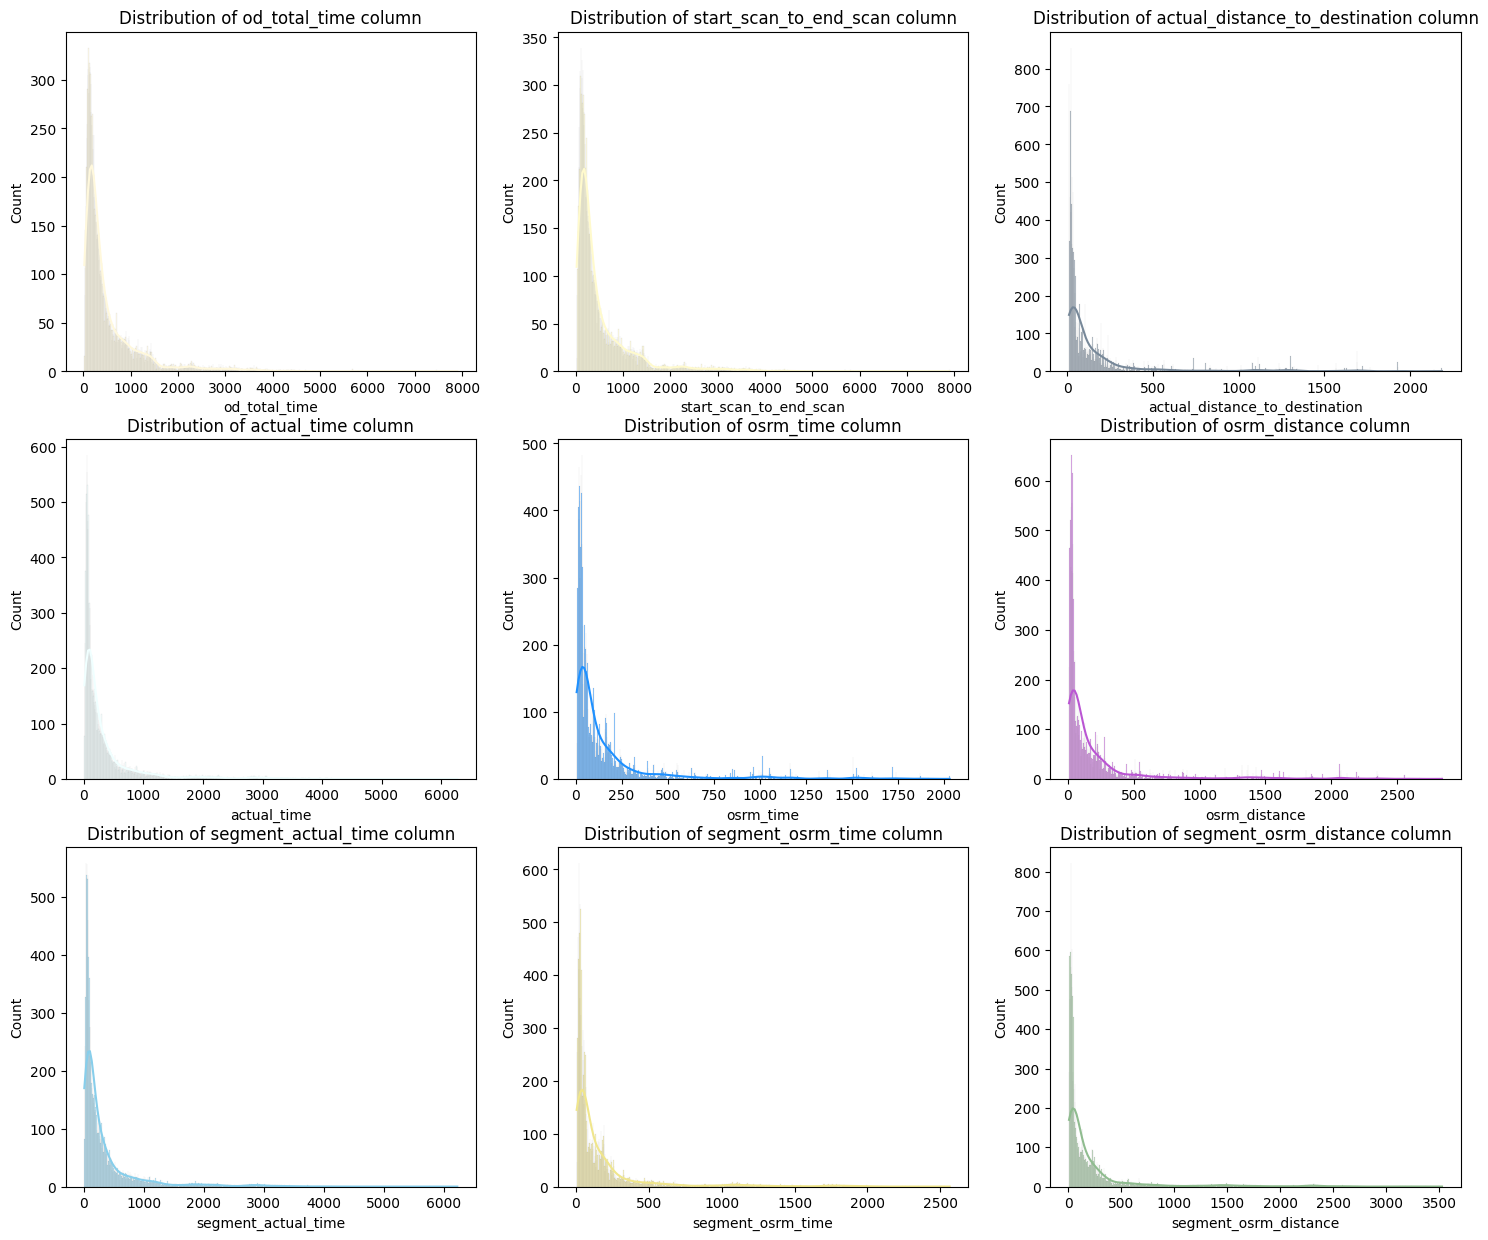

In [ ]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.histplot(df2[numerical_columns[i]], bins = 1000, kde = True, color = clr)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

Insights: The above plots indicate that all numerical columns exhibit right skewness in their distributions.

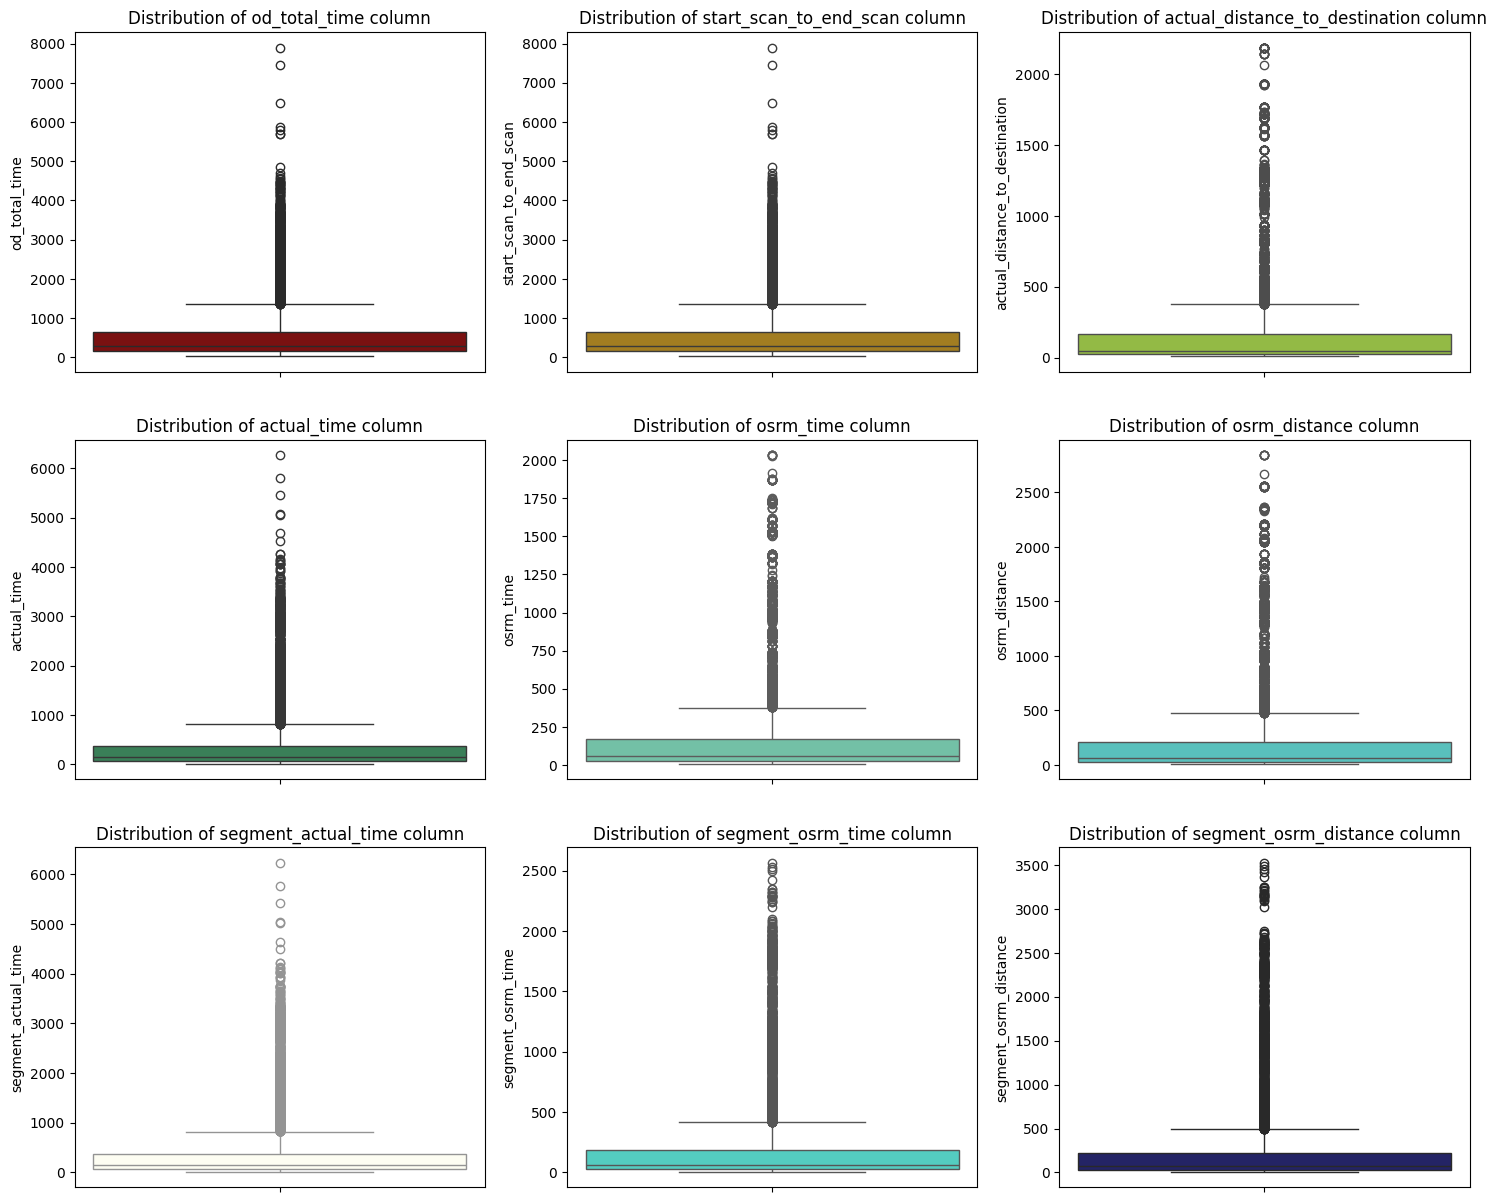

In [ ]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.boxplot(df2[numerical_columns[i]], color = clr)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

Insights: The above plots clearly reveal the presence of outliers in all numerical columns, which require appropriate treatment.

In [ ]:
for col in numerical_columns:
    Q1 = np.quantile(df2[col], 0.25)
    Q3 = np.quantile(df2[col], 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]

    print(f"Column: {col}")
    print(f" - Q1 (25th percentile): {Q1:.2f}")
    print(f" - Q3 (75th percentile): {Q3:.2f}")
    print(f" - IQR (Q3 - Q1): {IQR:.2f}")
    print(f" - Lower Bound: {lower_bound:.2f}")
    print(f" - Upper Bound: {upper_bound:.2f}")
    print(f" - Number of Outliers: {outliers.shape[0]}")
    print("-" * 40)

Column: od_total_time
 - Q1 (25th percentile): 149.93
 - Q3 (75th percentile): 638.20
 - IQR (Q3 - Q1): 488.27
 - Lower Bound: -582.48
 - Upper Bound: 1370.61
 - Number of Outliers: 1266
----------------------------------------
Column: start_scan_to_end_scan
 - Q1 (25th percentile): 149.00
 - Q3 (75th percentile): 637.00
 - IQR (Q3 - Q1): 488.00
 - Lower Bound: -583.00
 - Upper Bound: 1369.00
 - Number of Outliers: 1267
----------------------------------------
Column: actual_distance_to_destination
 - Q1 (25th percentile): 22.84
 - Q3 (75th percentile): 164.58
 - IQR (Q3 - Q1): 141.75
 - Lower Bound: -189.78
 - Upper Bound: 377.20
 - Number of Outliers: 1449
----------------------------------------
Column: actual_time
 - Q1 (25th percentile): 67.00
 - Q3 (75th percentile): 370.00
 - IQR (Q3 - Q1): 303.00
 - Lower Bound: -387.50
 - Upper Bound: 824.50
 - Number of Outliers: 1643
----------------------------------------
Column: osrm_time
 - Q1 (25th percentile): 29.00
 - Q3 (75th percent

Not all outliers are errors—some reflect natural variation within the data. Unless there’s a compelling reason, it’s advisable to retain them.

##  Do one-hot encoding of categorical variables (like route_type)

In [ ]:
df2['route_type'].value_counts()

route_type
Carting    8908
FTL        5909
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['route_type'] = label_encoder.fit_transform(df2['route_type'])

In [ ]:
# Get value counts after one-hot encoding

df2['route_type'].value_counts()

route_type
0    8908
1    5909
Name: count, dtype: int64

In [ ]:
# Get value counts of categorical variable 'data' before one-hot encoding

df2['data'].value_counts()

data
training    10654
test         4163
Name: count, dtype: int64

In [ ]:
# Perform one-hot encoding on categorical variable 'data'
label_encoder = LabelEncoder()
df2['data'] = label_encoder.fit_transform(df2['data'])

In [ ]:
# Get value counts after one-hot encoding

df2['data'].value_counts()

data
1    10654
0     4163
Name: count, dtype: int64

## 	Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

[]

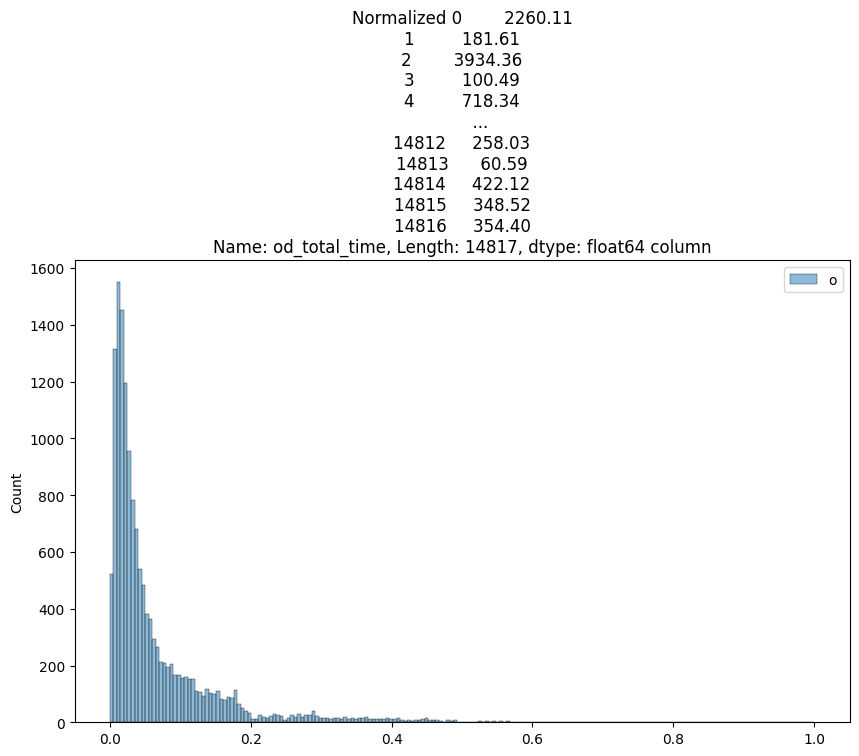

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

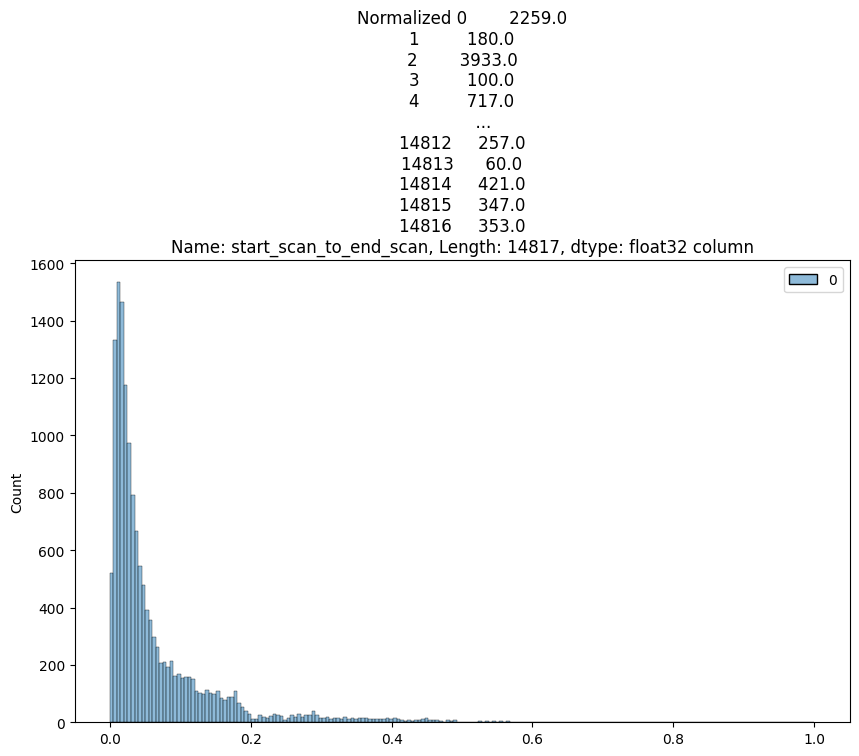

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['start_scan_to_end_scan']} column")
plt.plot()

[]

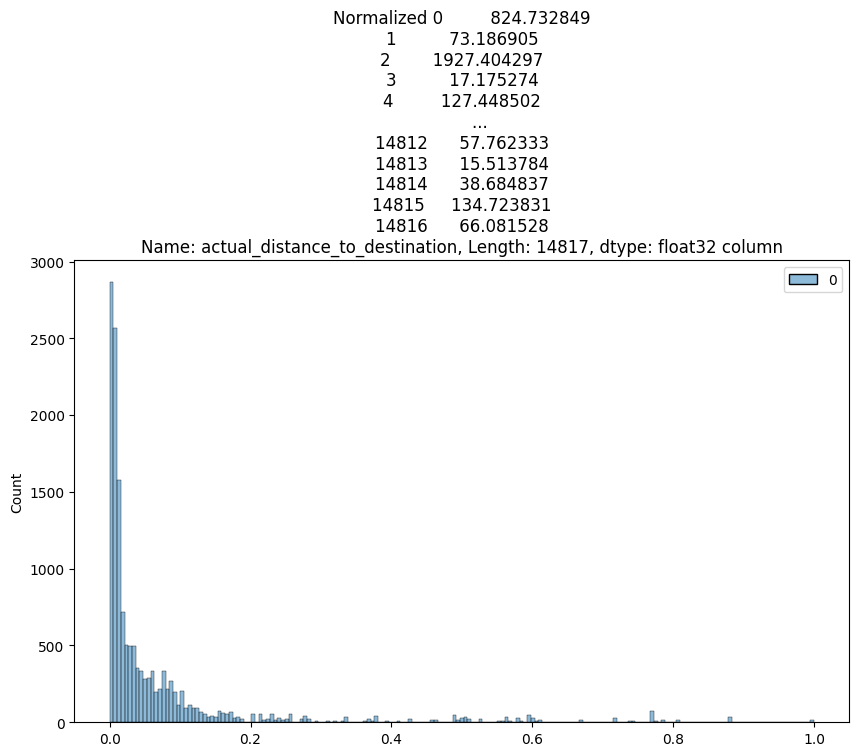

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['actual_distance_to_destination']} column")
plt.plot()

[]

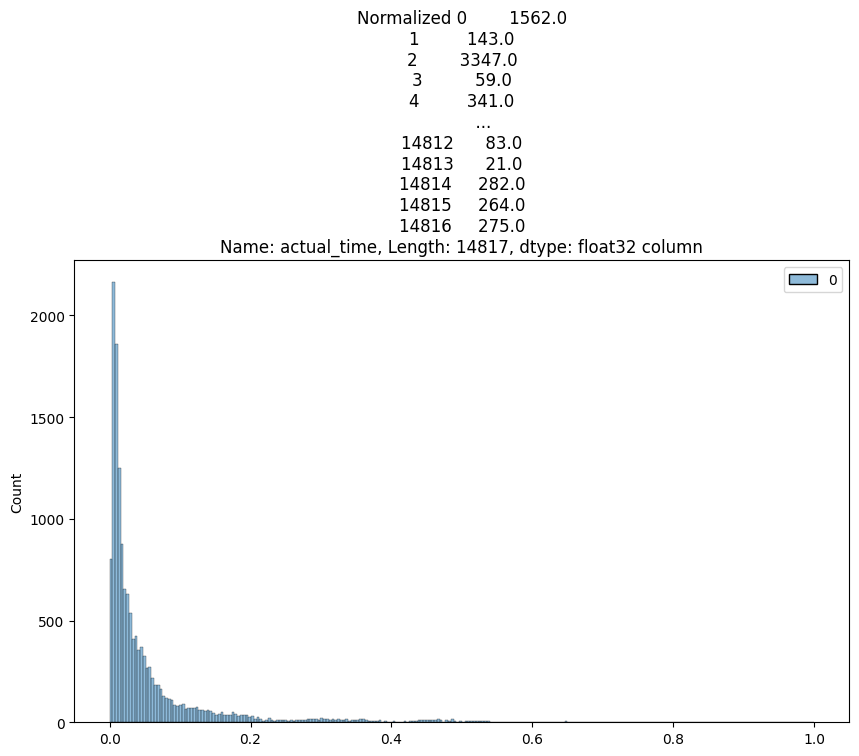

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['actual_time']} column")
plt.plot()

[]

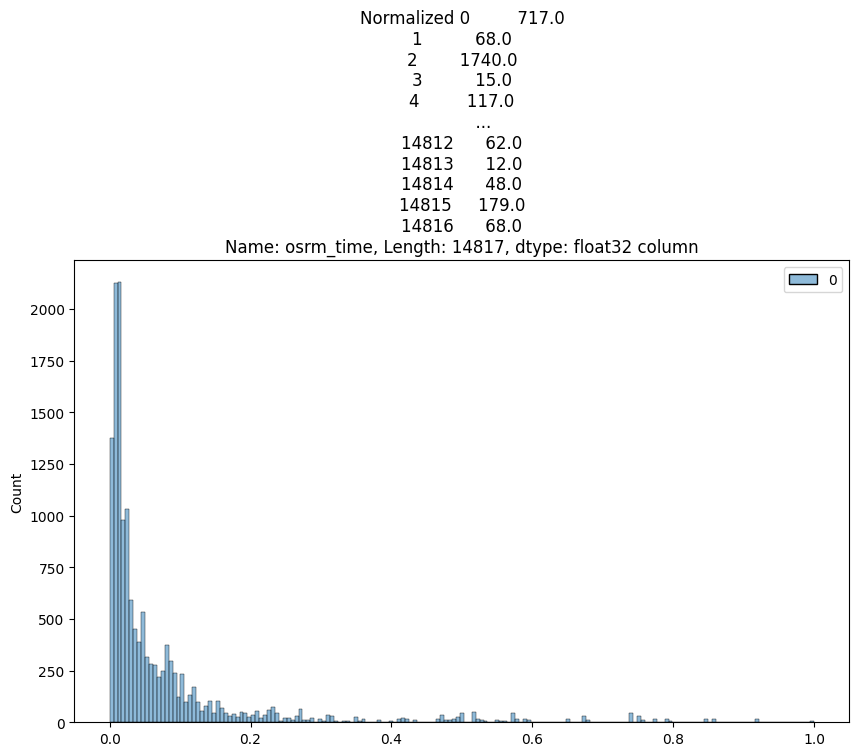

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['osrm_time']} column")
plt.plot()

[]

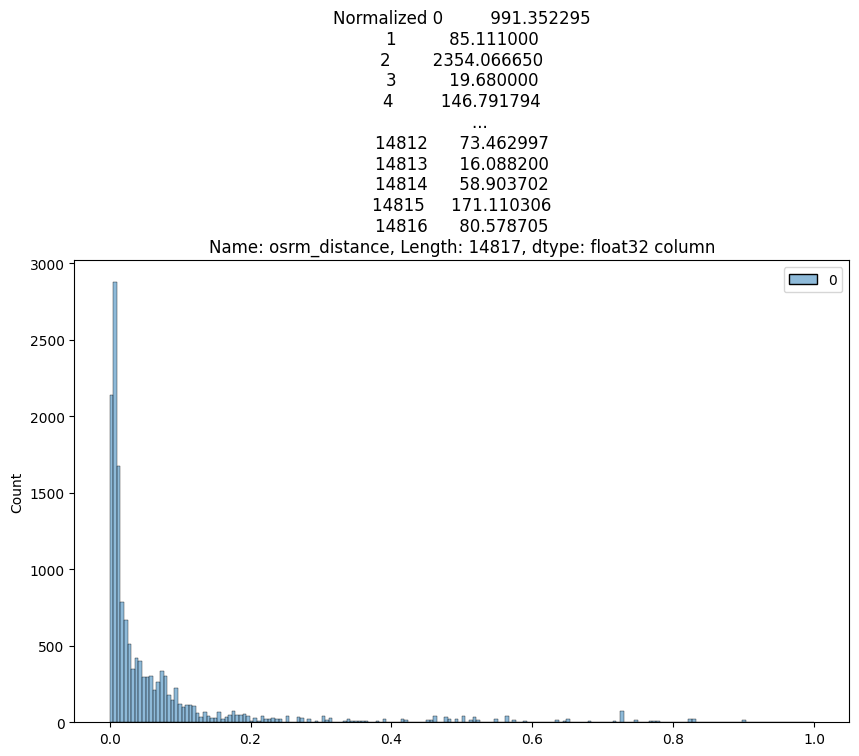

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['osrm_distance']} column")
plt.plot()

[]

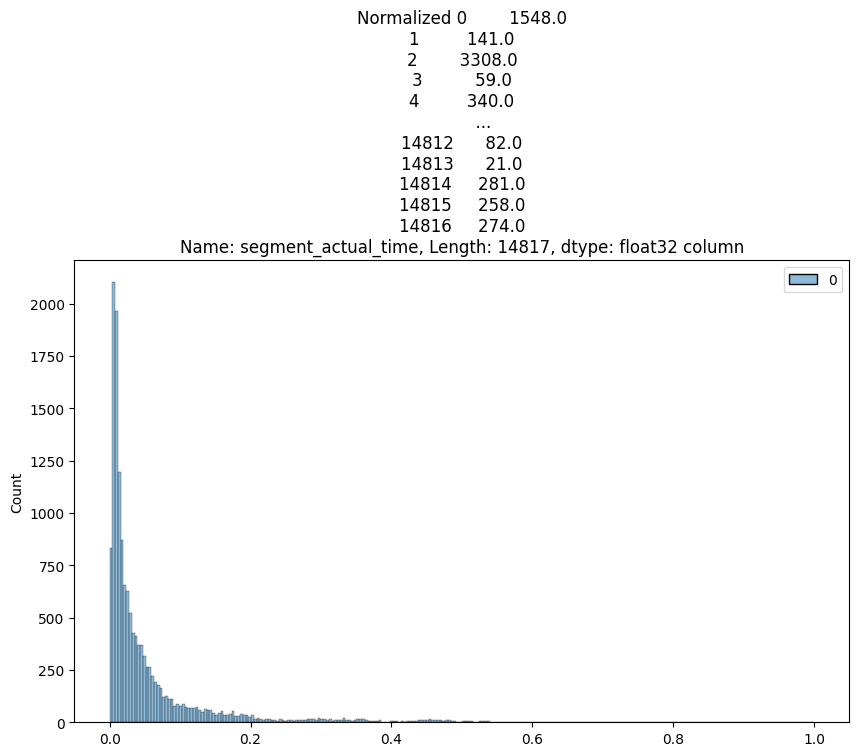

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_actual_time']} column")
plt.plot()

[]

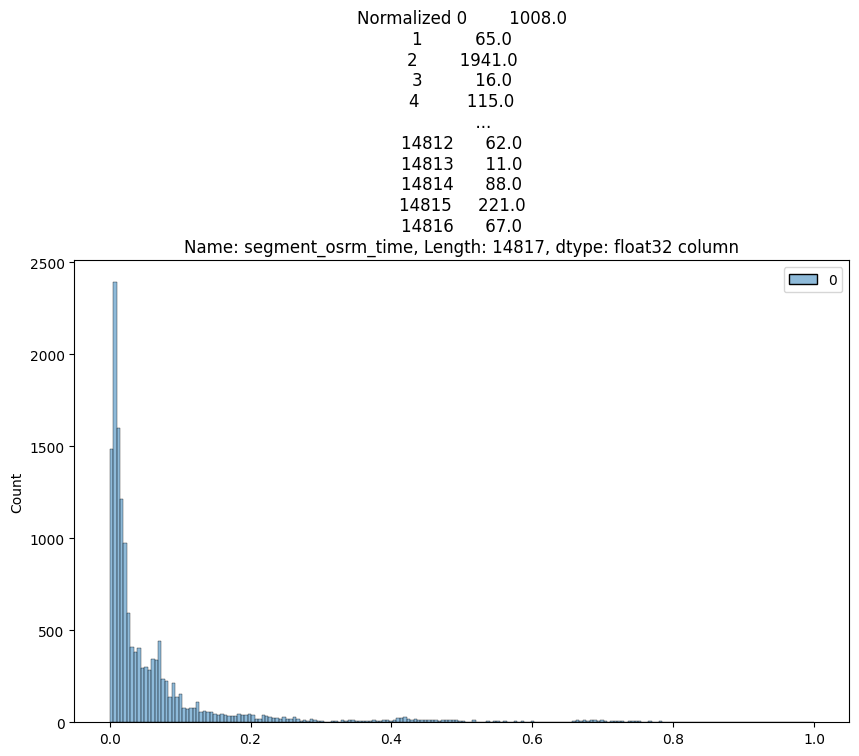

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_osrm_time']} column")
plt.plot()

[]

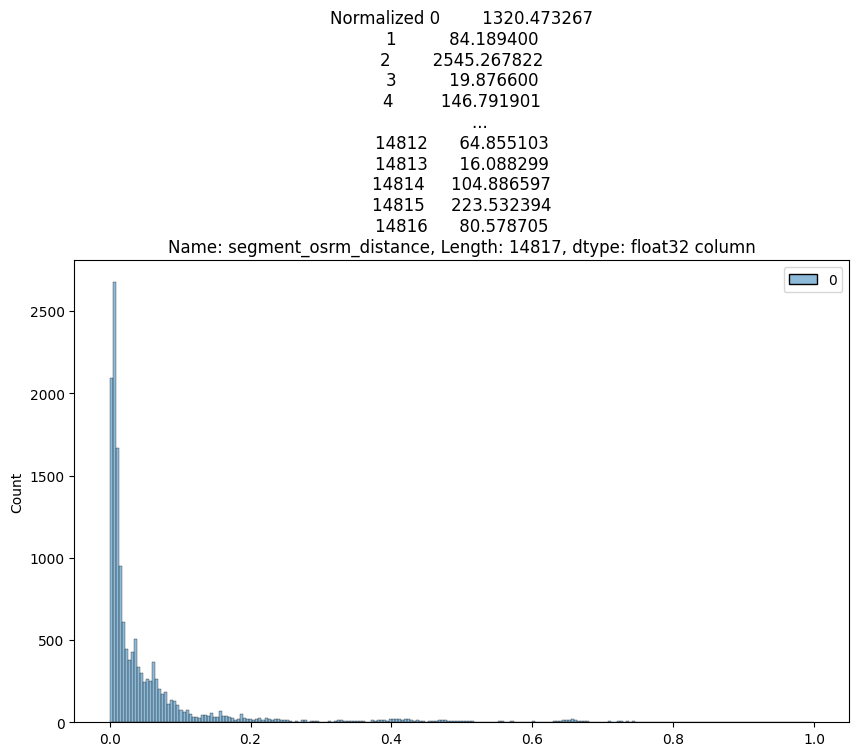

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_osrm_distance']} column")
plt.plot()

# Column Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

[]

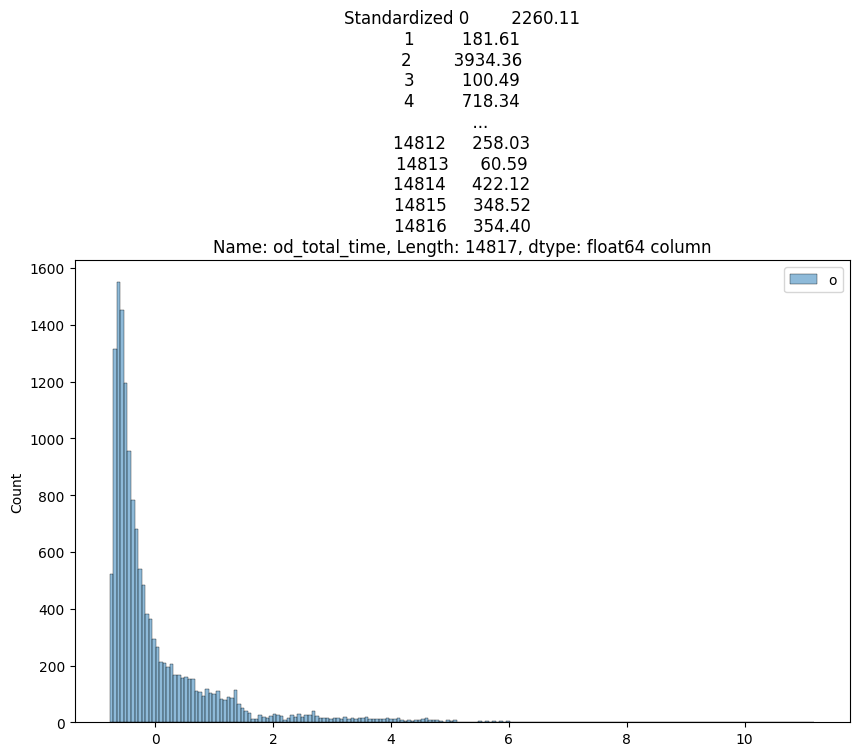

In [ ]:
plt.figure(figsize = (10, 6))
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

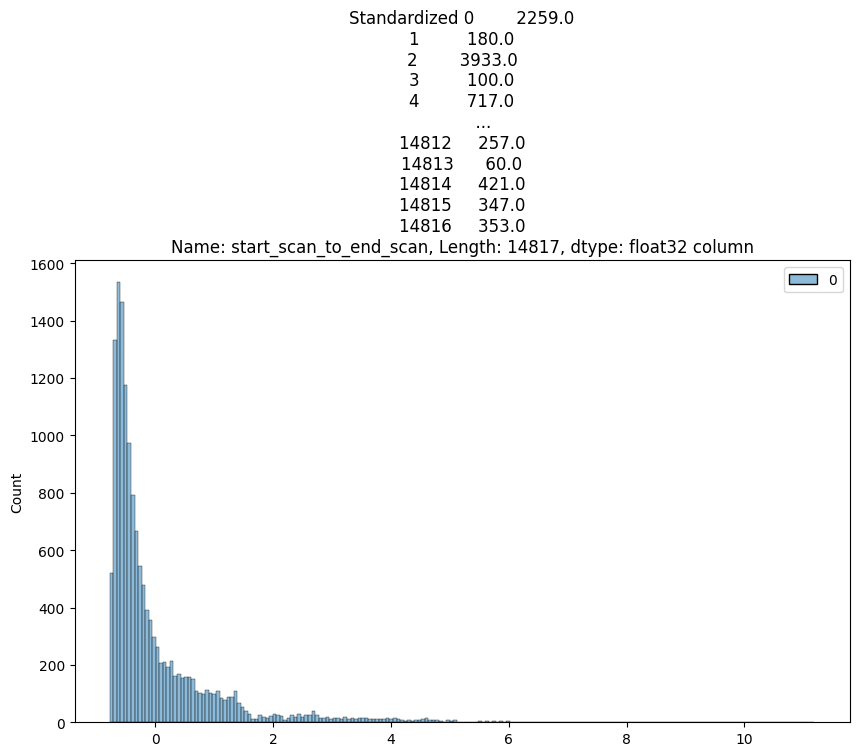

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['start_scan_to_end_scan']} column")
plt.plot()

[]

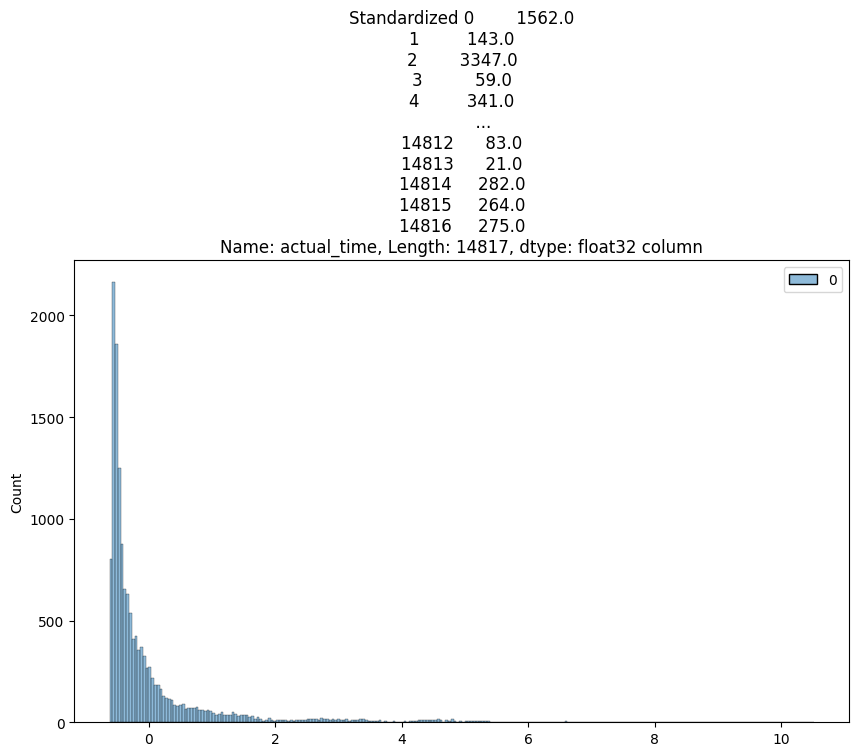

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['actual_time']} column")
plt.plot()

[]

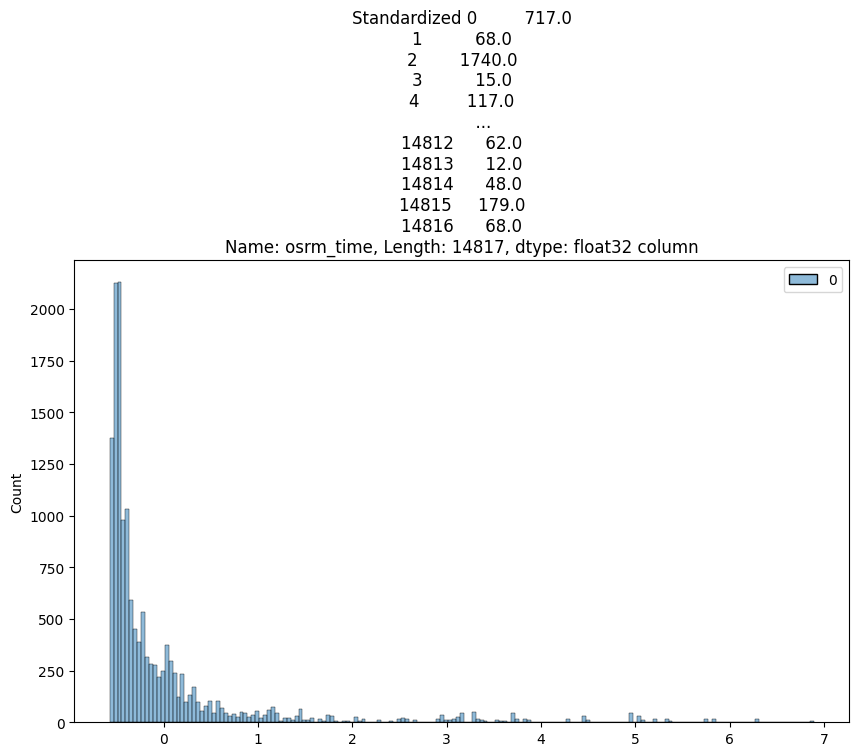

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['osrm_time']} column")
plt.plot()

[]

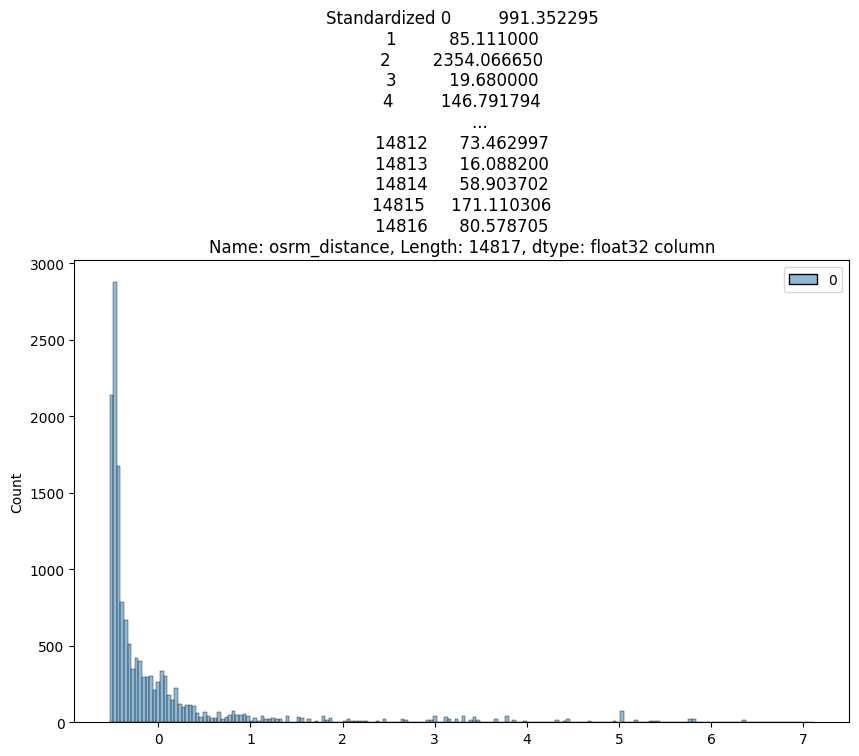

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['osrm_distance']} column")
plt.plot()

[]

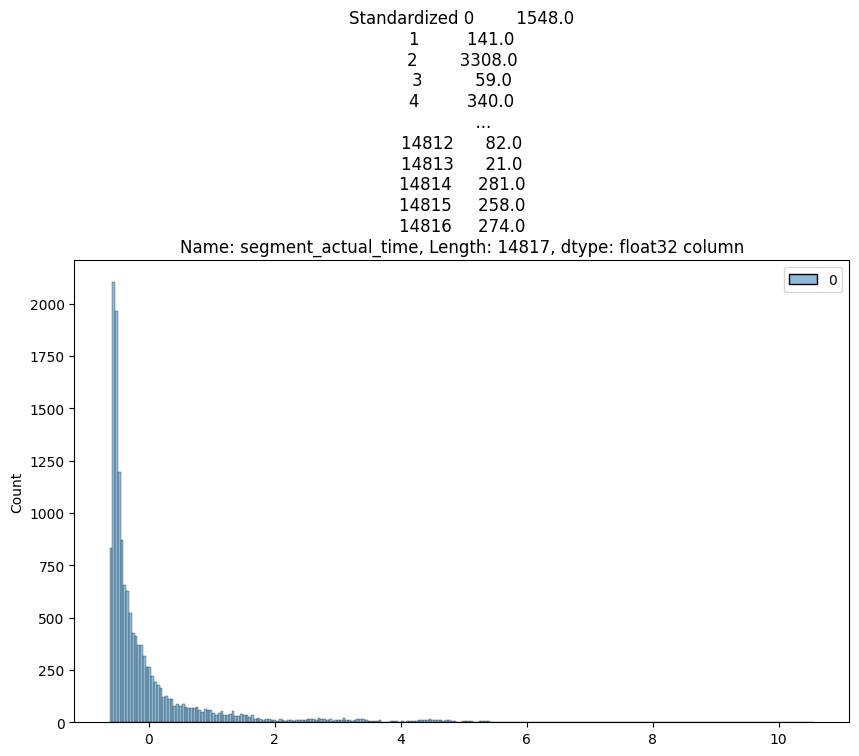

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_actual_time']} column")
plt.plot()

[]

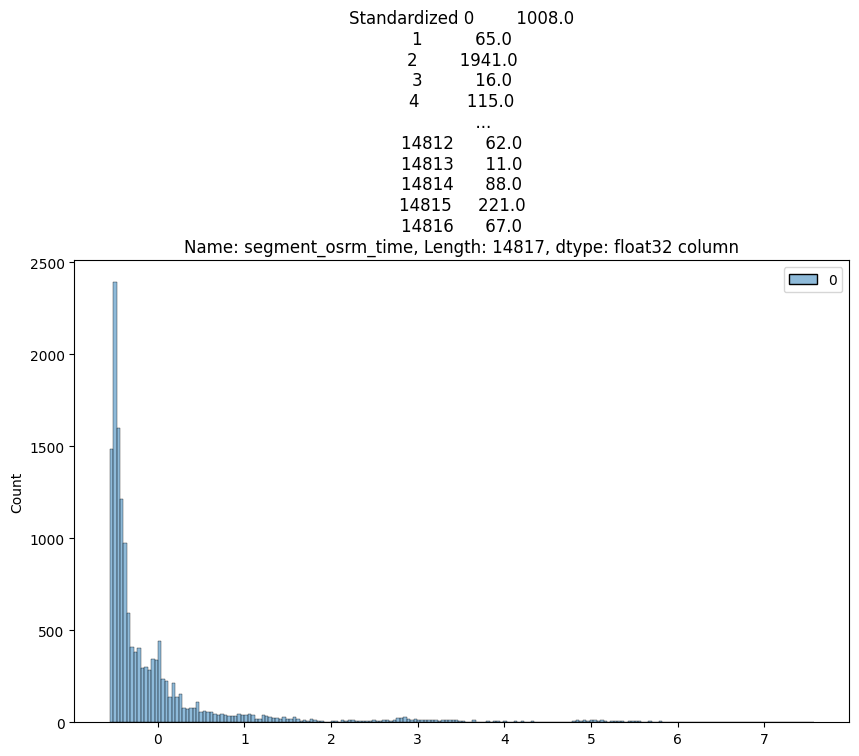

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_osrm_time']} column")
plt.plot()

[]

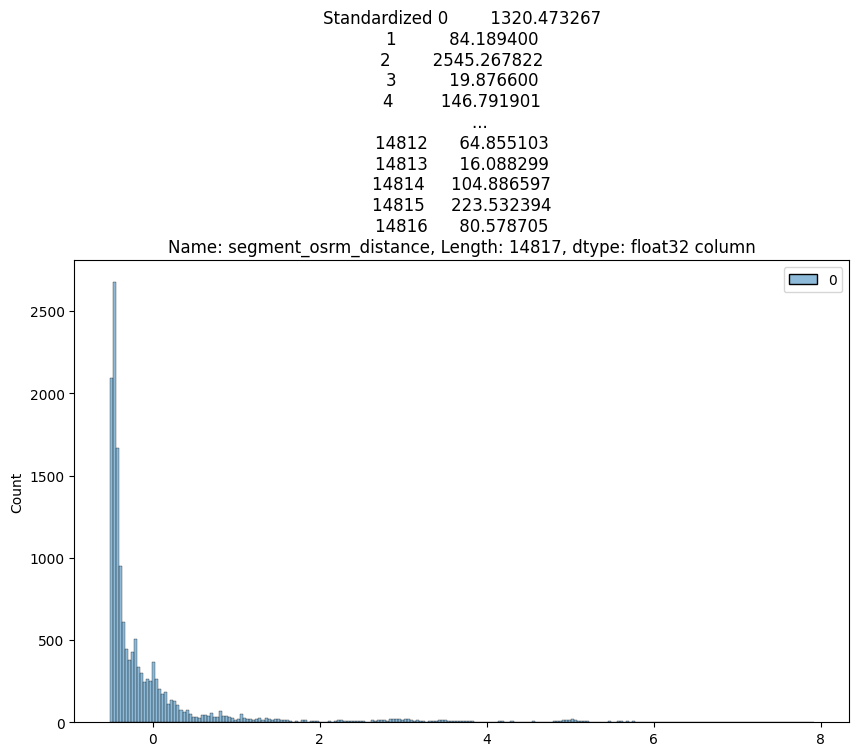

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_osrm_distance']} column")
plt.plot()

# Logistics Data Summary & Key Insights

## Data Overview
- **Time Period**: From `2018-09-12 00:00:16` to `2018-10-08 03:00:24`
- **Unique IDs**:
  - Trip IDs: **14,817**
  - Source Centers: **1,508**
  - Destination Centers: **1,481**
  - Source Cities: **690**
  - Destination Cities: **806**

---

## Data Nature & Characteristics
- The dataset contains more **testing data** than actual training data.
- The most common **route type** is: **Carting**
- **14 unique location IDs** are missing, indicating incomplete mapping.
- Trip creation follows a pattern:
  - **Increases after noon**
  - **Peaks at 10:00 PM**
  - **Declines post-midnight**
- The highest number of trips occurred in the **Mid-month order volume spikes** suggest customer demand behavior trends.

---

## Geographical Distribution

### Source Trends
- **Top Source States**:
  - Maharashtra
  - Karnataka
  - Haryana
  - Tamil Nadu
  - Telangana

- **Top Source Cities**:
  1. Mumbai  
  2. Bengaluru
  3. Gurgaon  
  4. Delhi   
  5. Bhiwandi  
  _These cities indicate strong seller activity and are major supply hubs._

### Destination Trends
- **Top Destination States**:
  - Maharashtra
  - Karnataka
  - Haryana
  - Tamil Nadu
  - Uttar Pradesh

- **Top Destination Cities**:
  1. Mumbai  
  2. Bengaluru  
  3. Gurgaon  
  4. Delhi  
  5. Chennai  
  _These cities reflect high order volume and customer demand._

- *Note*: The cities **Bangalore** and **Bengaluru** were merged to remove naming inconsistencies.

---

## Statistical Feature Comparisons

| Feature Comparison                              | Statistical Result | Interpretation                                 |
|-------------------------------------------------|--------------------|-------------------------------------------------|
| `start_scan_to_end_scan` vs `od_total_time`     | Similar             | Captures overlapping delivery duration events   |
| `actual_time` vs `osrm_time`                    | Different           | Actual vs. estimated travel time mismatch       |
| `start_scan_to_end_scan` vs `segment_actual_time` | Similar           | Good alignment at the segment level             |
| `osrm_distance` vs `segment_osrm_distance`      | Different           | Segment-wise distances vary from full estimates |
| `osrm_time` vs `segment_osrm_time`              | Different           | OSRM time estimates inconsistent segment-wise   |

---

## Conclusion
- The dataset reflects meaningful logistics patterns and daily trip cycles.
- Statistically significant differences were observed between actual and estimated (OSRM) values, especially for time and distance features.
- These insights can support route optimization strategies and improve forecasting accuracy.


# Recommendations

### 1. Optimize OSRM Routing Engine
- The **OSRM trip planning system** shows notable discrepancies between predicted and actual delivery metrics.
- Enhancing its configuration to reflect real-world conditions (e.g., traffic, road closures, delivery patterns) will lead to **more accurate and efficient route planning**.

### 2. Reduce Gap Between `osrm_time` and `actual_time`
- There is a measurable **difference between estimated (`osrm_time`) and real (`actual_time`) delivery durations**.
- Reducing this gap will:
  - Improve delivery time accuracy,
  - Enhance customer satisfaction by providing **realistic ETA**.

### 3. Address Disparities in `osrm_distance` vs `actual_distance`
- The **route followed in reality differs from the OSRM-predicted path**, which could be due to:
  - Delivery personnel not adhering to predefined routes,
  - Inaccurate route prediction based on distance, traffic, or road quality.
- Action: Investigate and calibrate OSRM parameters or train field staff to follow optimized paths.

### 4. Enhance Key Corridors for High-Demand States
- Most deliveries are concentrated in states like **Maharashtra, Karnataka, Haryana, and Tamil Nadu**.
- Recommendation:
  - **Strengthen infrastructure and logistics capabilities** in these corridors to improve serviceability and reduce delays.

### 5. Conduct Customer Profiling for High-Demand States
- Perform detailed **customer segmentation and profiling** in:
  - Maharashtra
  - Karnataka
  - Haryana
  - Tamil Nadu
  - Uttar Pradesh
- Objective: Understand purchasing patterns and pain points to **enhance user experience and loyalty**.

### 6. Account for State-Specific Terrain and Traffic
- Consider **geographic and logistical challenges** (e.g., heavy traffic, difficult terrain) that vary by state.
- Use this insight to:
  - Plan better during **high-demand seasons** like festivals,
  - Optimize **resource allocation** and **delivery time expectations**.